## 对一个文件夹下的所有图片做线性变换，并保存在指定位置
$Meringue$
$5/3/2017$

In [10]:
import numpy as np
from PIL import Image
import cv2
import os
import random

from imageTrans import *
from cifar10_os import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (28.0, 28.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### 定义图像变换类

In [2]:
class CIFAR10_Transformation(object):
   
    def __init__(self,img_path):
        self.img_path = img_path
    
    
    ## Translation
    def PIL_Translate(self,file_in_path,file_out_path,min_pix,max_pix):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        img_index_max = 50000
        
        print 'translating the images...'
        for img_name in img_name_list:
            img_index = img_name_list.index(img_name)
            # img_index = int(img_name.split('_')[0])
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            translate_pix = random.randint(min_pix,max_pix)
            
            img = Image.open(img_dir)
            
            # save primative images
            img_save_name = img_name
            img.save(file_out_path+img_save_name)
            
            # save translated images (Right-Bottom)
            img_translateRB = cv2_Translate(img_dir,translate_pix,translate_pix)
            img_save_name = str(1*img_index_max+img_index)+'_'+img_label_format
            img_translateRB.save(file_out_path+img_save_name)
            
            # save translated images (Right-Top)
            img_translateRT = cv2_Translate(img_dir,translate_pix,-translate_pix)
            img_save_name = str(2*img_index_max+img_index)+'_'+img_label_format
            img_translateRT.save(file_out_path+img_save_name)
            
            # save translated images (Left-Bottom)
            img_translateLB = cv2_Translate(img_dir,-translate_pix,translate_pix)
            img_save_name = str(3*img_index_max+img_index)+'_'+img_label_format
            img_translateLB.save(file_out_path+img_save_name)
            
            # save translated images (Left-Top)
            img_translateLT = cv2_Translate(img_dir,-translate_pix,-translate_pix)
            img_save_name = str(4*img_index_max+img_index)+'_'+img_label_format
            img_translateLT.save(file_out_path+img_save_name)
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'    
    
    ## horizenral flip
    def PIL_horizFlip(self,file_in_path,file_out_path):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        img_index_max = 250000
        
        print 'flipping the images...'
        for img_name in img_name_list:
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            img = Image.open(img_dir)
            
            # save primative images
            img_save_name = img_name
            img.save(file_out_path+img_save_name)
            
            # save translated images (Right-Bottom)
            img_horizFlipped = PIL_Flip_LR(img_dir)
            img_save_name = str(1*img_index_max+img_index)+'_'+img_label_format
            img_horizFlipped.save(file_out_path+img_save_name)
            
            
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'    
        
        
    def PIL_randomRotate(self,file_in_path,file_out_path,angle_min = -45,angle_max = 45,times = 10, flag = 0):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        max_index = 50000
        
        print 'rotating the images randomly...'
        for img_index,img_name in enumerate(img_name_list):
            img_dir = file_in_path+img_name
            img_label_format = img_name.split('_')[1]
            
            img = Image.open(img_dir)
            angles = np.random.randint(angle_min,angle_max,times)
            if flag == 1:
                # save original images
                img_save_name = img_name
                img.save(file_out_path+img_save_name)
                # save rotated images
                for i,angle in enumerate(angles):
                    img_rotate = PIL_Rotate(img_dir,angle)
                    img_save_name = str((i+1)*max_index+img_index)+'_'+img_label_format
                    img_rotate.save(file_out_path+img_save_name)
                
            if flag == 0:
                # save rotated images
                for i,angle in enumerate(angles):
                    img_rotate = PIL_Rotate(img_dir,angle)
                    img_save_name = str((i+1)*max_index+img_index)+'_'+img_label_format
                    img_rotate.save(file_out_path+img_save_name)
                    
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'
    
        
        
    ## Rotation and flip   
    def PIL_Rotate_Flip(self,file_in_path,file_out_path):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        
        print 'rotating and flipping the images...'
        for img_name in img_name_list:
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            img = Image.open(img_dir)
            
            # save primative images
            img_save_name = img_name
            img.save(file_out_path+img_save_name)
            # save rotated images (45)
            img_rotate45 = PIL_Rotate(img_dir,45)
            img_save_name = str(1*img_num+img_index)+'_'+img_label_format
            img_rotate45.save(file_out_path+img_save_name)
            # save rotated images (90)
            img_rotate90 = PIL_Rotate(img_dir,90)
            img_save_name = str(2*img_num+img_index)+'_'+img_label_format
            img_rotate90.save(file_out_path+img_save_name)
            # save rotated images (180)
            img_rotate180 = PIL_Rotate(img_dir,180)
            img_save_name = str(3*img_num+img_index)+'_'+img_label_format
            img_rotate180.save(file_out_path+img_save_name)
            # save flipped images (horizental flip)
            img_flip_lr = PIL_Flip_LR(img_dir)
            img_save_name = str(4*img_num+img_index)+'_'+img_label_format
            img_flip_lr.save(file_out_path+img_save_name)
            # save flipped images (vertical flip)
            img_flip_tb = PIL_Flip_TB(img_dir)
            img_save_name = str(5*img_num+img_index)+'_'+img_label_format
            img_flip_tb.save(file_out_path+img_save_name)
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'
        
        
    ## Adjust brightness
    def PIL_Enhance(self,file_in_path,file_out_path):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        
        print 'enhancing the images...'
        for img_name in img_name_list:
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            img = Image.open(img_dir)
            
            # save primative images
            img_save_name = img_name
            img.save(file_out_path+img_save_name)
            # save enhanced images (0.6)
            img_enhance06 = PIL_Enhance(img_dir,0.6)
            img_save_name = str(1*img_num+img_index)+'_'+img_label_format
            img_enhance06.save(file_out_path+img_save_name)
            # save enhanced images (1.4)
            img_enhance14 = PIL_Enhance(img_dir,1.4)
            img_save_name = str(2*img_num+img_index)+'_'+img_label_format
            img_enhance14.save(file_out_path+img_save_name)
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'
        
        
    ## Affine
    def PIL_Affine(self,file_in_path,file_out_path,delta_pix):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        
        print 'affining the images...'
        for img_name in img_name_list:
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            img = Image.open(img_dir)
            
            # save primative images
            img_save_name = img_name
            img.save(file_out_path+img_save_name)
            # save affined images
            img_affine = cv2_Affine(img_dir,delta_pix)
            img_save_name = str(1*img_num+img_index)+'_'+img_label_format
            img_affine.save(file_out_path+img_save_name)
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'
        
        
    ## random Affine
    def PIL_randomAffine(self,file_in_path,file_out_path,max_delta_pix=6, flag = 0):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        
        print 'affining the images...'
        for img_name in img_name_list:
            # image information
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            delta_pix = np.float32(np.random.randint(-max_delta_pix,max_delta_pix+1,[3,2]))
            
            img = Image.open(img_dir)
            
            if flag == 1:
                # for training set(including train, train_train and train_valid
                max_index = 50000
                # for test set
                # max_index = 10000
                
                # save primative images
                img_save_name = img_name
                img.save(file_out_path+img_save_name)
                # save affined images
                img_affine = cv2_Affine(img_dir,delta_pix)
                img_save_name = str(1*max_index+img_index)+'_'+img_label_format
                img_affine.save(file_out_path+img_save_name)
                
            if flag == 0:
                # save affined images
                img_affine = cv2_Affine(img_dir,delta_pix)
                img_save_name = str(img_index)+'_'+img_label_format
                img_affine.save(file_out_path+img_save_name)
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'
        
    ## random Affine (range)
    def PIL_randomAffine_limit(self,file_in_path,file_out_path, max_delta_pix=2, flag = 0):
        img_name_list = os.listdir(file_in_path)
        img_num = len(img_name_list)
        
        print 'affining the images...'
        for img_name in img_name_list:
            # image information
            img_index = img_name_list.index(img_name)
            img_dir = file_in_path+img_name # absolute path
            img_label_format = img_name.split('_')[1] # label.png
            
            delta1 = np.random.randint(0,max_delta_pix+1,[1,2])
            
            delta2_x = np.random.randint(-max_delta_pix,0+1)
            delta2_y = np.random.randint(0,max_delta_pix+1)
            delta2 = [delta2_x,delta2_y]
            
            delta3_x = np.random.randint(0,max_delta_pix+1)
            delta3_y = np.random.randint(-max_delta_pix,0+1)
            delta3 = [delta3_x,delta3_y]
            
            delta_pix = np.float32(np.zeros((3,2)))
            delta_pix[0,] = delta1
            delta_pix[1,] = delta2
            delta_pix[2,] = delta3
            
            img = Image.open(img_dir)
            max_index = 50000
            
            if flag == 1:
                # save primative images
                img_save_name = img_name
                img.save(file_out_path+img_save_name)
                # save affined images
                img_affine = cv2_Affine(img_dir,delta_pix)
                img_save_name = str(1*max_index+img_index)+'_'+img_label_format
                img_affine.save(file_out_path+img_save_name)
                
            if flag == 0:
                # save affined images
                img_affine = cv2_Affine(img_dir,delta_pix)
                img_save_name = str(img_index)+'_'+img_label_format
                img_affine.save(file_out_path+img_save_name)
                
            
            # show the process (percentage)
            if (100*img_index/float(img_num))%5==0:
                print '%d%% finished...' %(img_index/float(img_num)*100)
                
        print 'done.'

### 定义一个图像变换对象

In [3]:
cifar10_path = '/home/meringue/DataBase/cifar-10-batches-py/train/'
cifar10_trans = CIFAR10_Transformation(cifar10_path)

## Transformation on training set

### 对训练集（45,000）做随机平移变换，4个方向分别做一次，共生成45,000×4=225，000张图片

In [4]:
%%time
## Translation
file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train/'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate/'
cifar10_trans.PIL_Translate(file_in_path,file_out_path,4,8)

translating the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2min 5s, sys: 8.99 s, total: 2min 14s
Wall time: 3min 51s


total image number:  225000


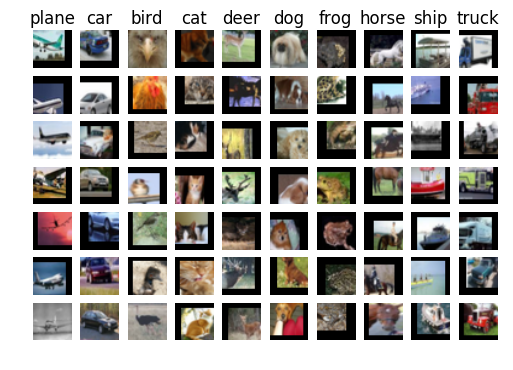

In [4]:
# file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train/'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,7)

### 对随机平移后的训练集（225,000）做水平翻转，共生成225,000×2=450,000张图片

In [4]:
%%time
## Horizental flip
file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate/'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate_horizFlip/'
cifar10_trans.PIL_horizFlip(file_in_path,file_out_path)

flipping the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 20min 34s, sys: 52.5 s, total: 21min 26s
Wall time: 49min 5s


total image number:  450000


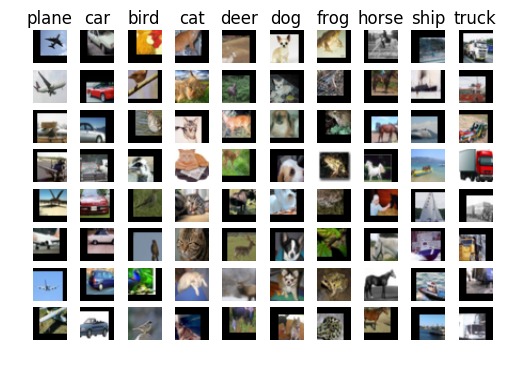

In [5]:
# file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate//'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_translate_horizFlip//'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,8)

### 对训练集（50,000）做旋转（4种）和翻转变换（2种），共生成50,000×(4+2)=300,000张图片

In [4]:
%%time
file_in_path = cifar10_path
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/rotate_flip_train/'
cifar10_trans.PIL_Rotate_Flip(file_in_path,file_out_path)

rotating and flipping the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 3min 41s, sys: 23.5 s, total: 4min 5s
Wall time: 8min 27s


total image number:  300000


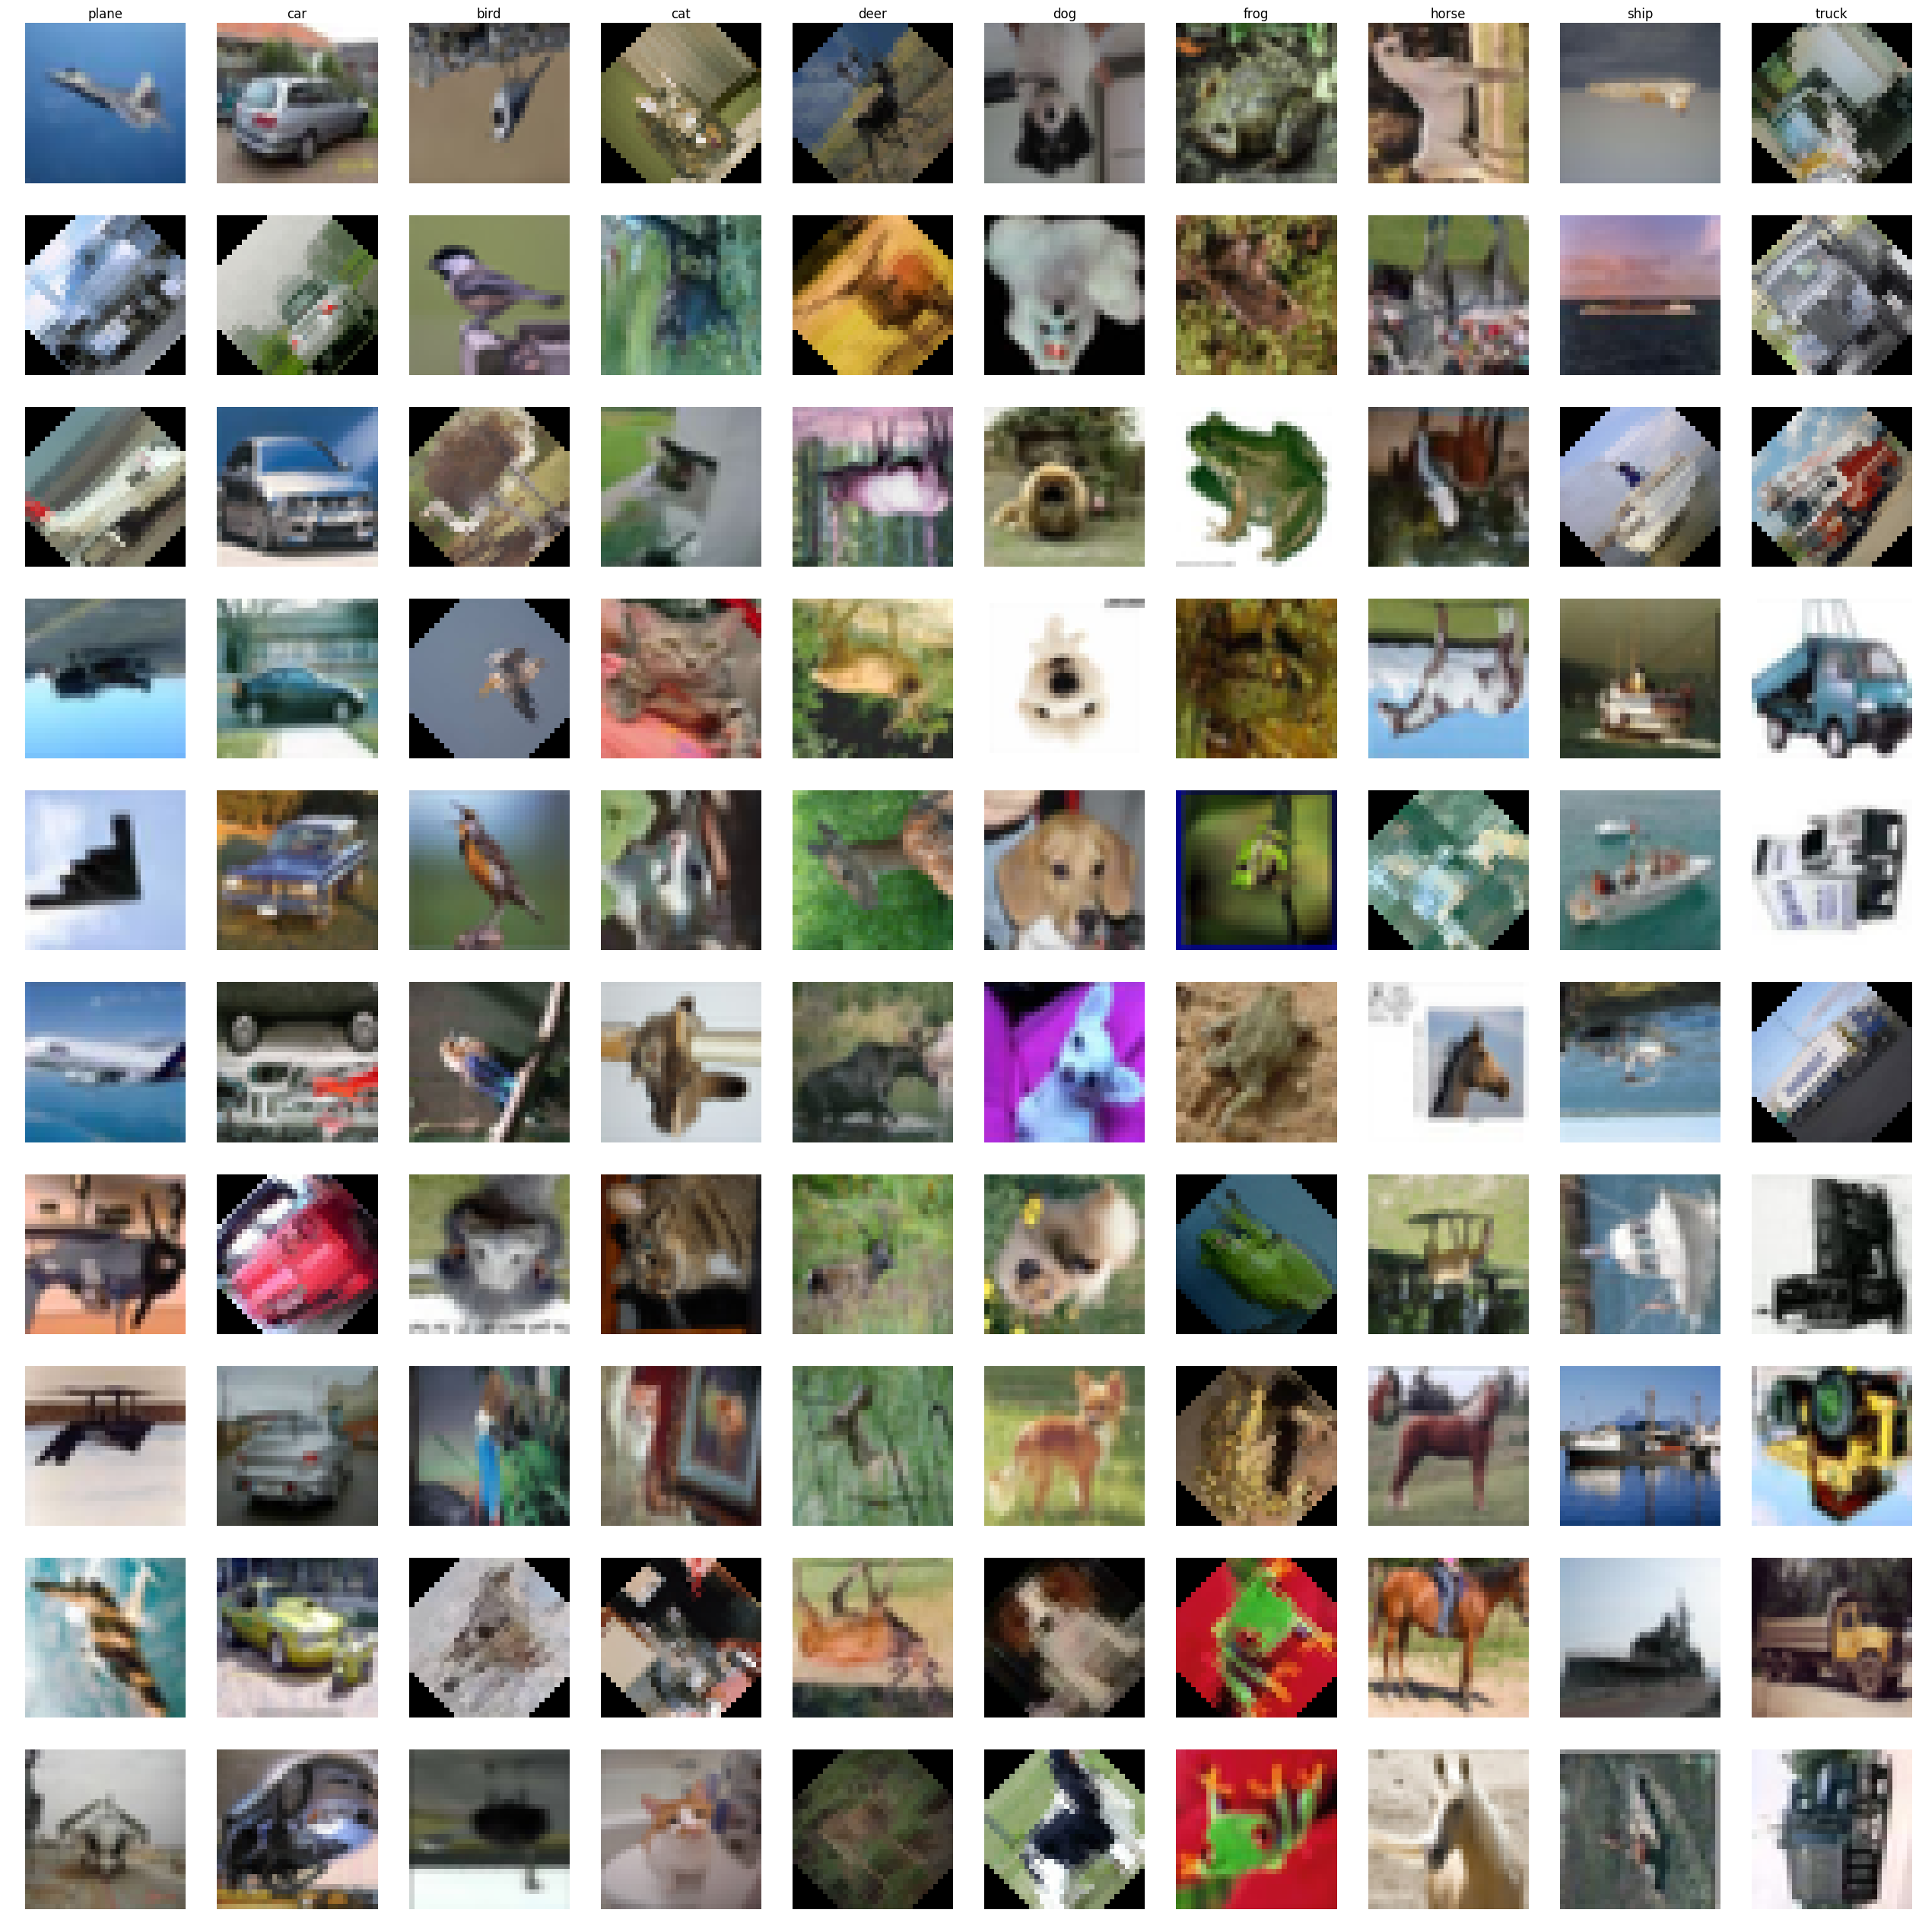

In [5]:
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对经旋转和平移后的训练集（300,000）做亮度变换（增强，降低共2种），共有900,000张图片（包括变换前的300,000张图片）

In [6]:
%%time
file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/rotate_flip_train/'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/enhance_train/'
cifar10_trans.PIL_Enhance(file_in_path,file_out_path)

enhancing the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 29min 19s, sys: 1min 8s, total: 30min 27s
Wall time: 1h 3min 11s


total image number:  900000


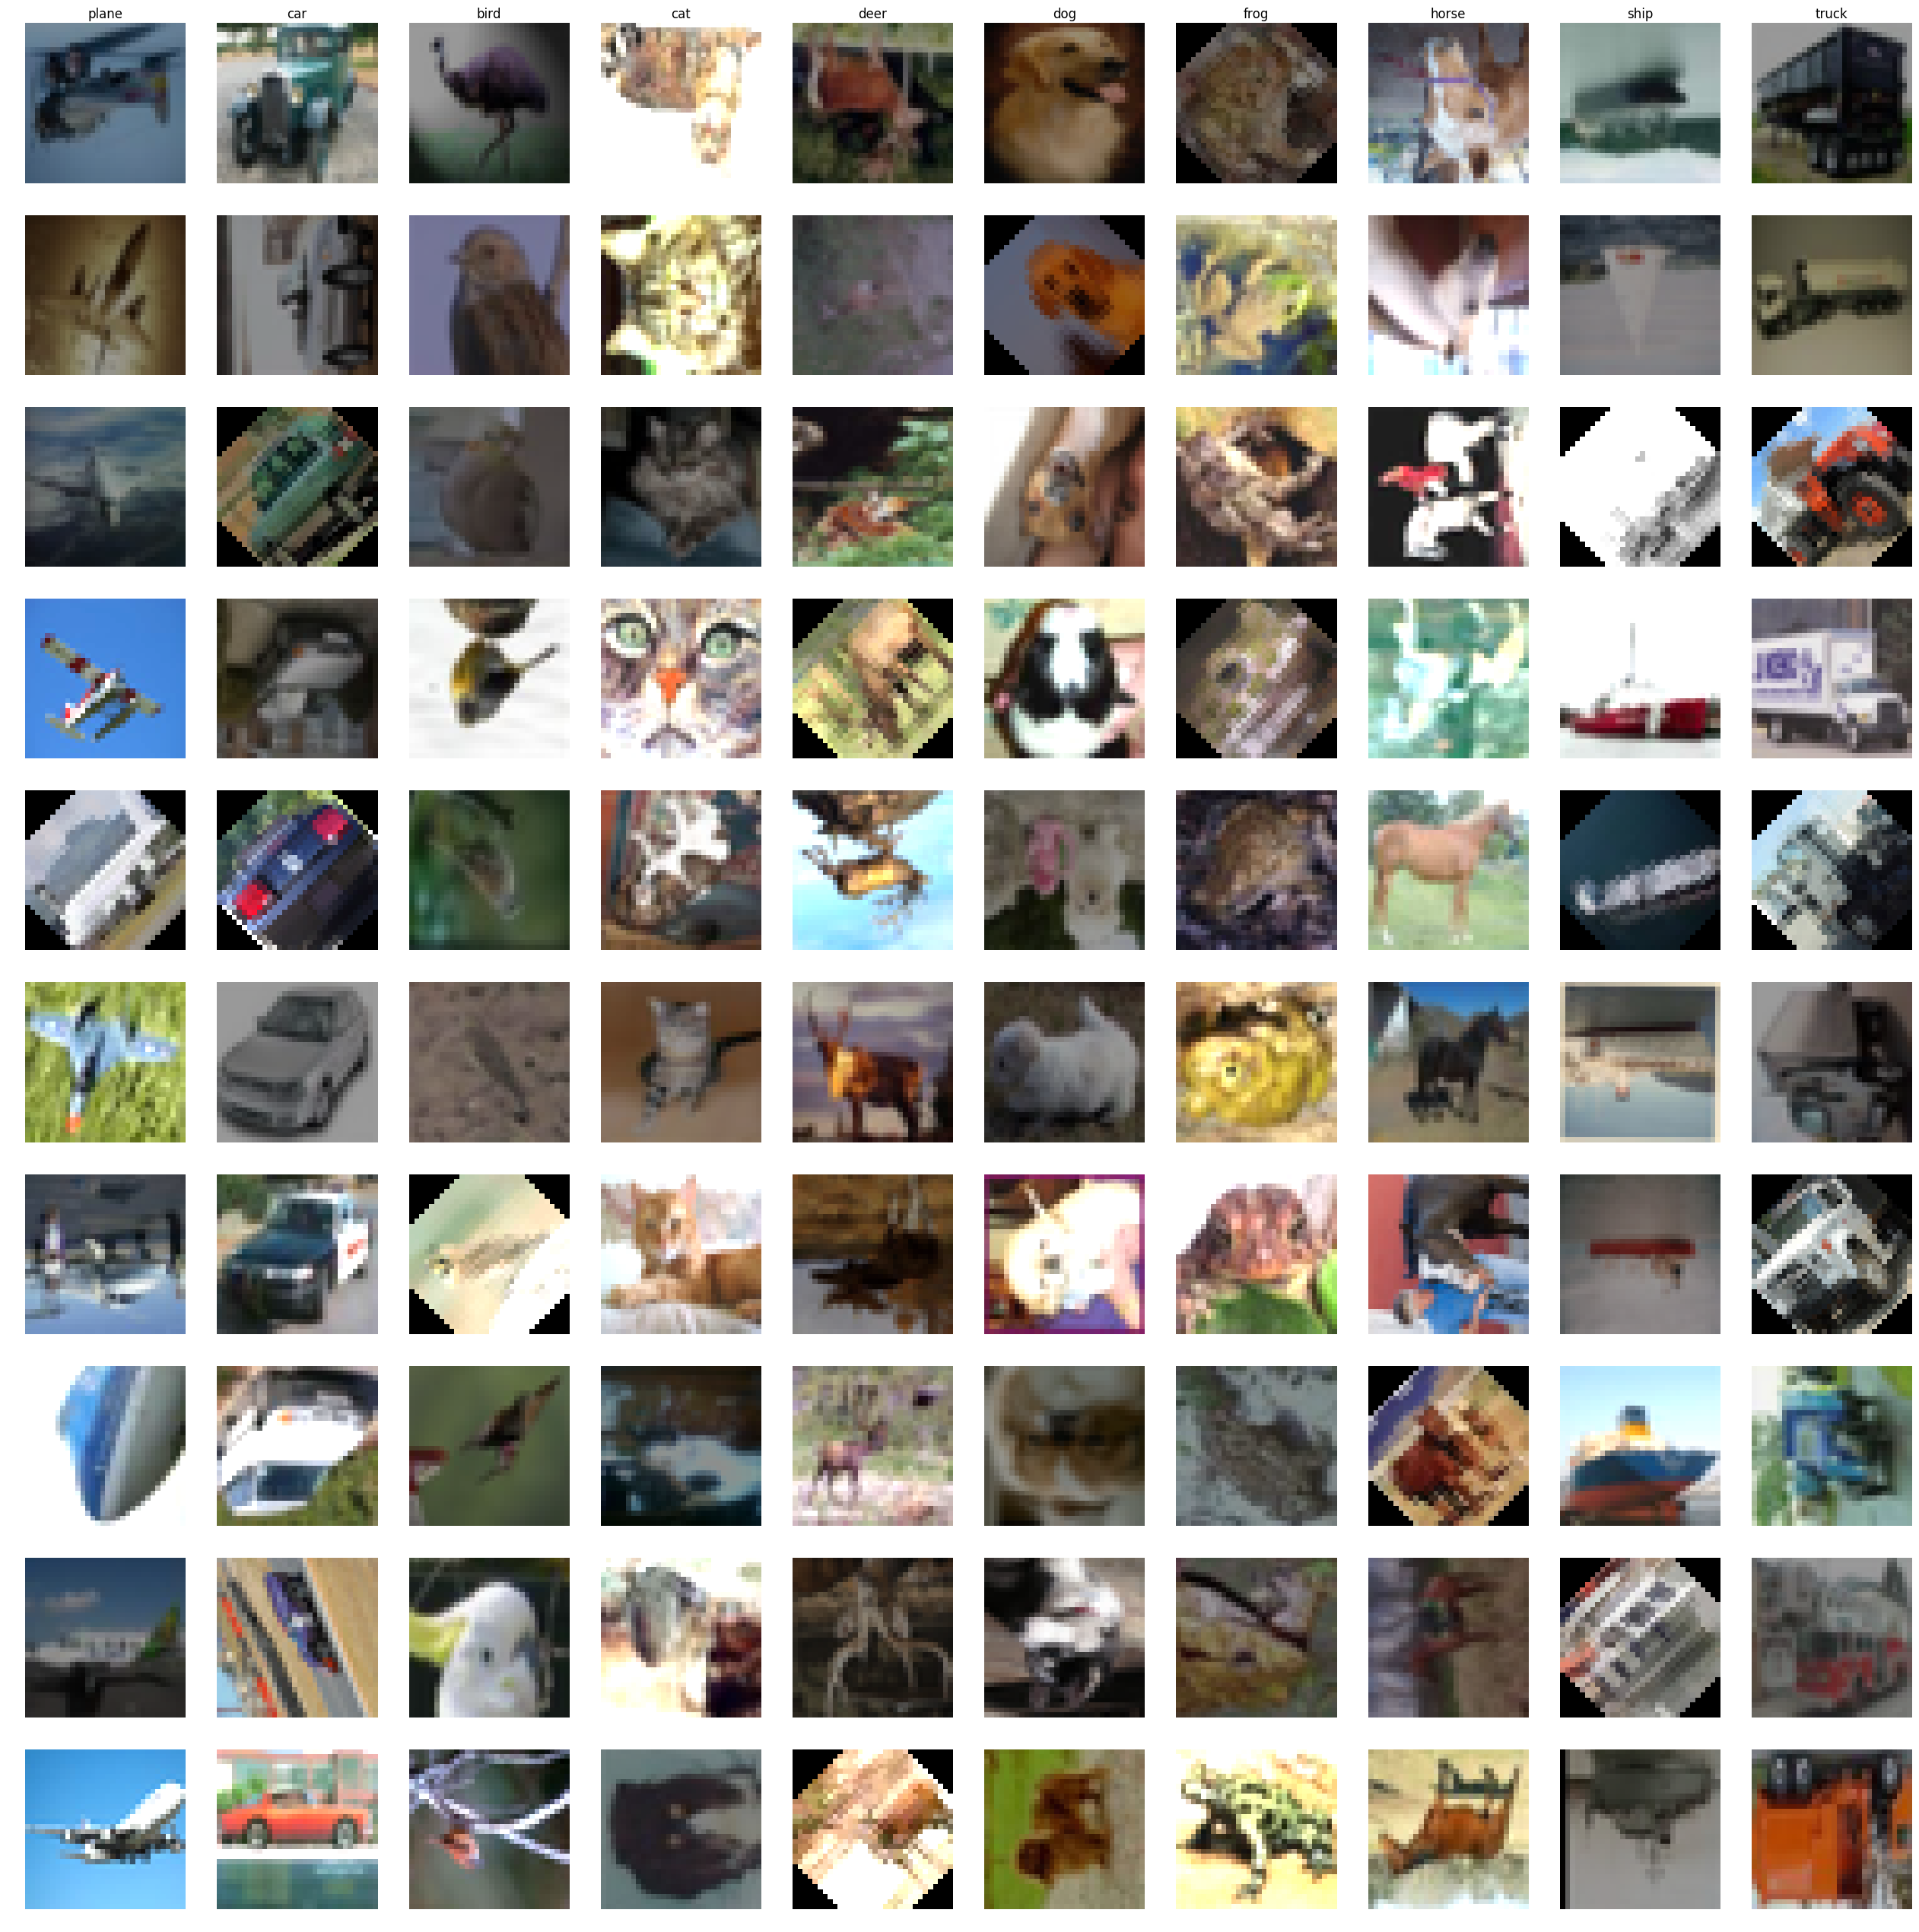

In [7]:
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对经旋转、平移和亮度变换的训练集（900,000）做固定方式的仿射变换，共有1800,000张图片（变换前+变换后）

In [4]:
%%time
file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/enhance_train/'
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/affine_train/'
cifar10_trans.PIL_Affine(file_in_path,file_out_path)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 1h 59min 5s, sys: 2min 46s, total: 2h 1min 51s
Wall time: 4h 4min 6s


total image number:  1800000


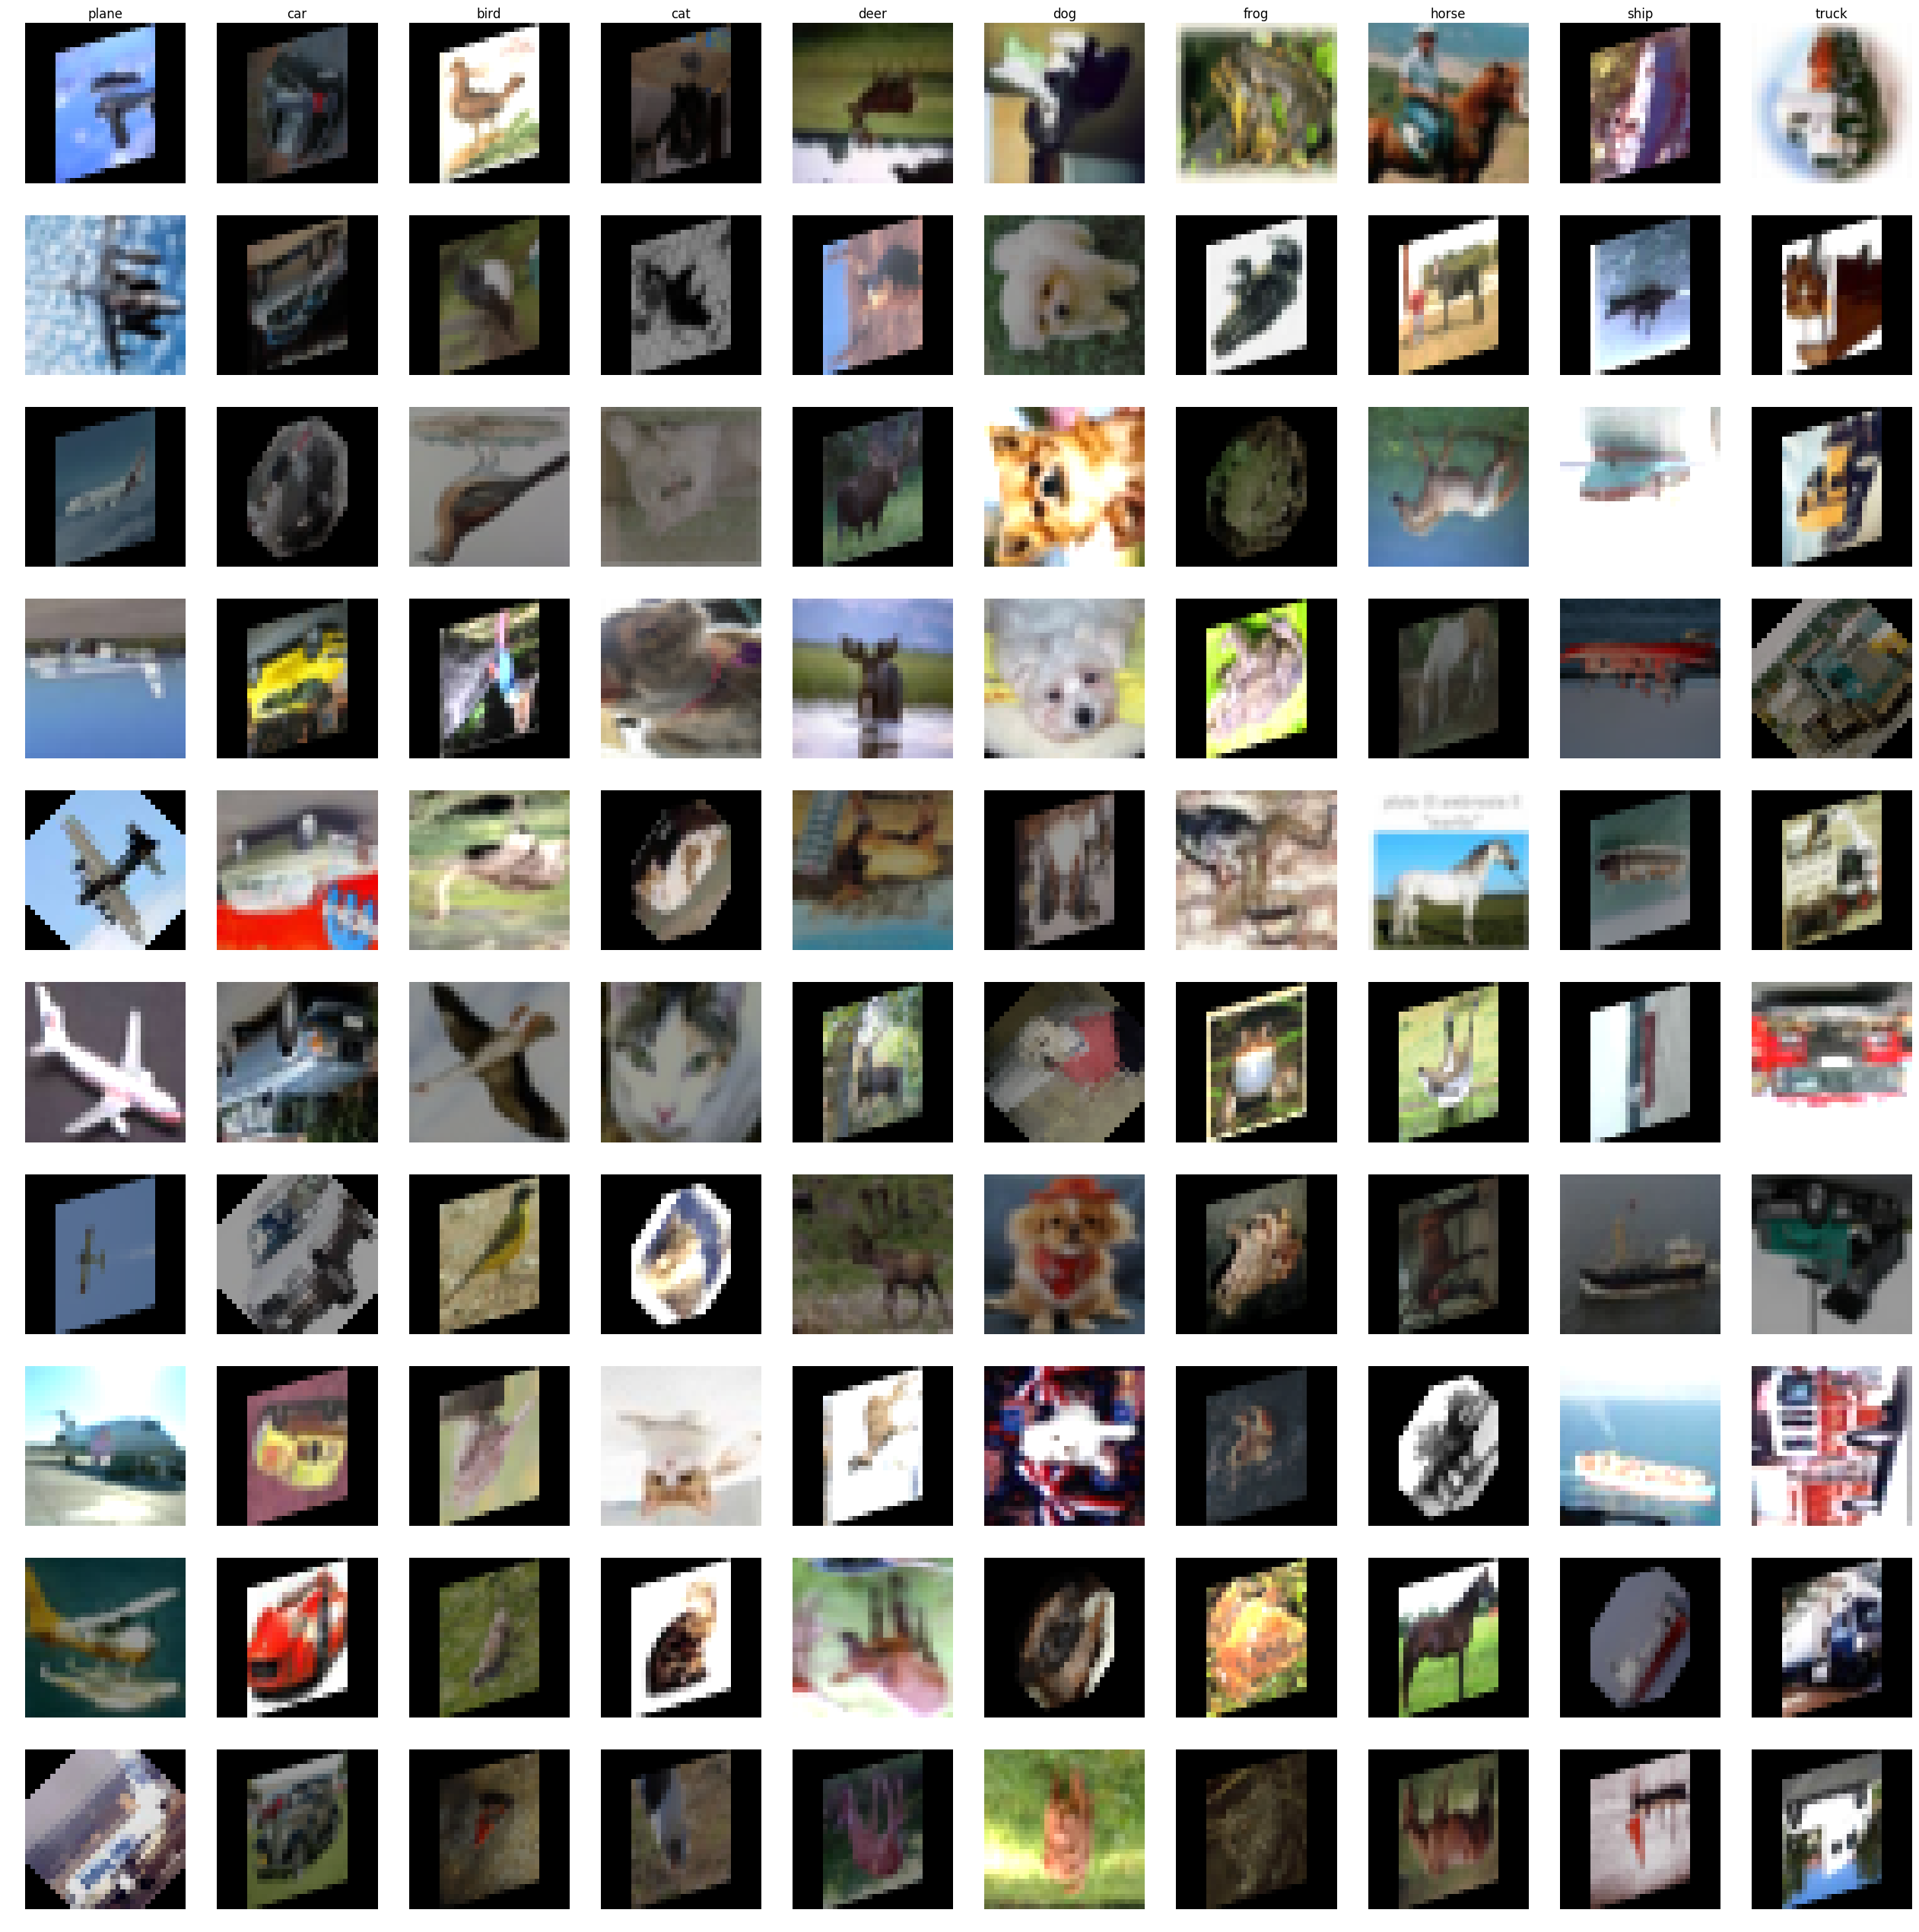

In [5]:
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

## Random Affine transformation on training set

In [4]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取4）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_with_rat4/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,4,flag=1)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2min 31s, sys: 10.7 s, total: 2min 42s
Wall time: 5min 59s


total image number:  90000


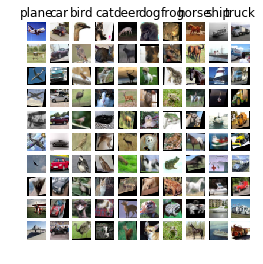

In [5]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_with_rat4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

## Random Affine transformation on test set

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取2）

In [4]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine2/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,2)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.72 s, sys: 304 ms, total: 5.03 s
Wall time: 5.01 s


total image number:  10000


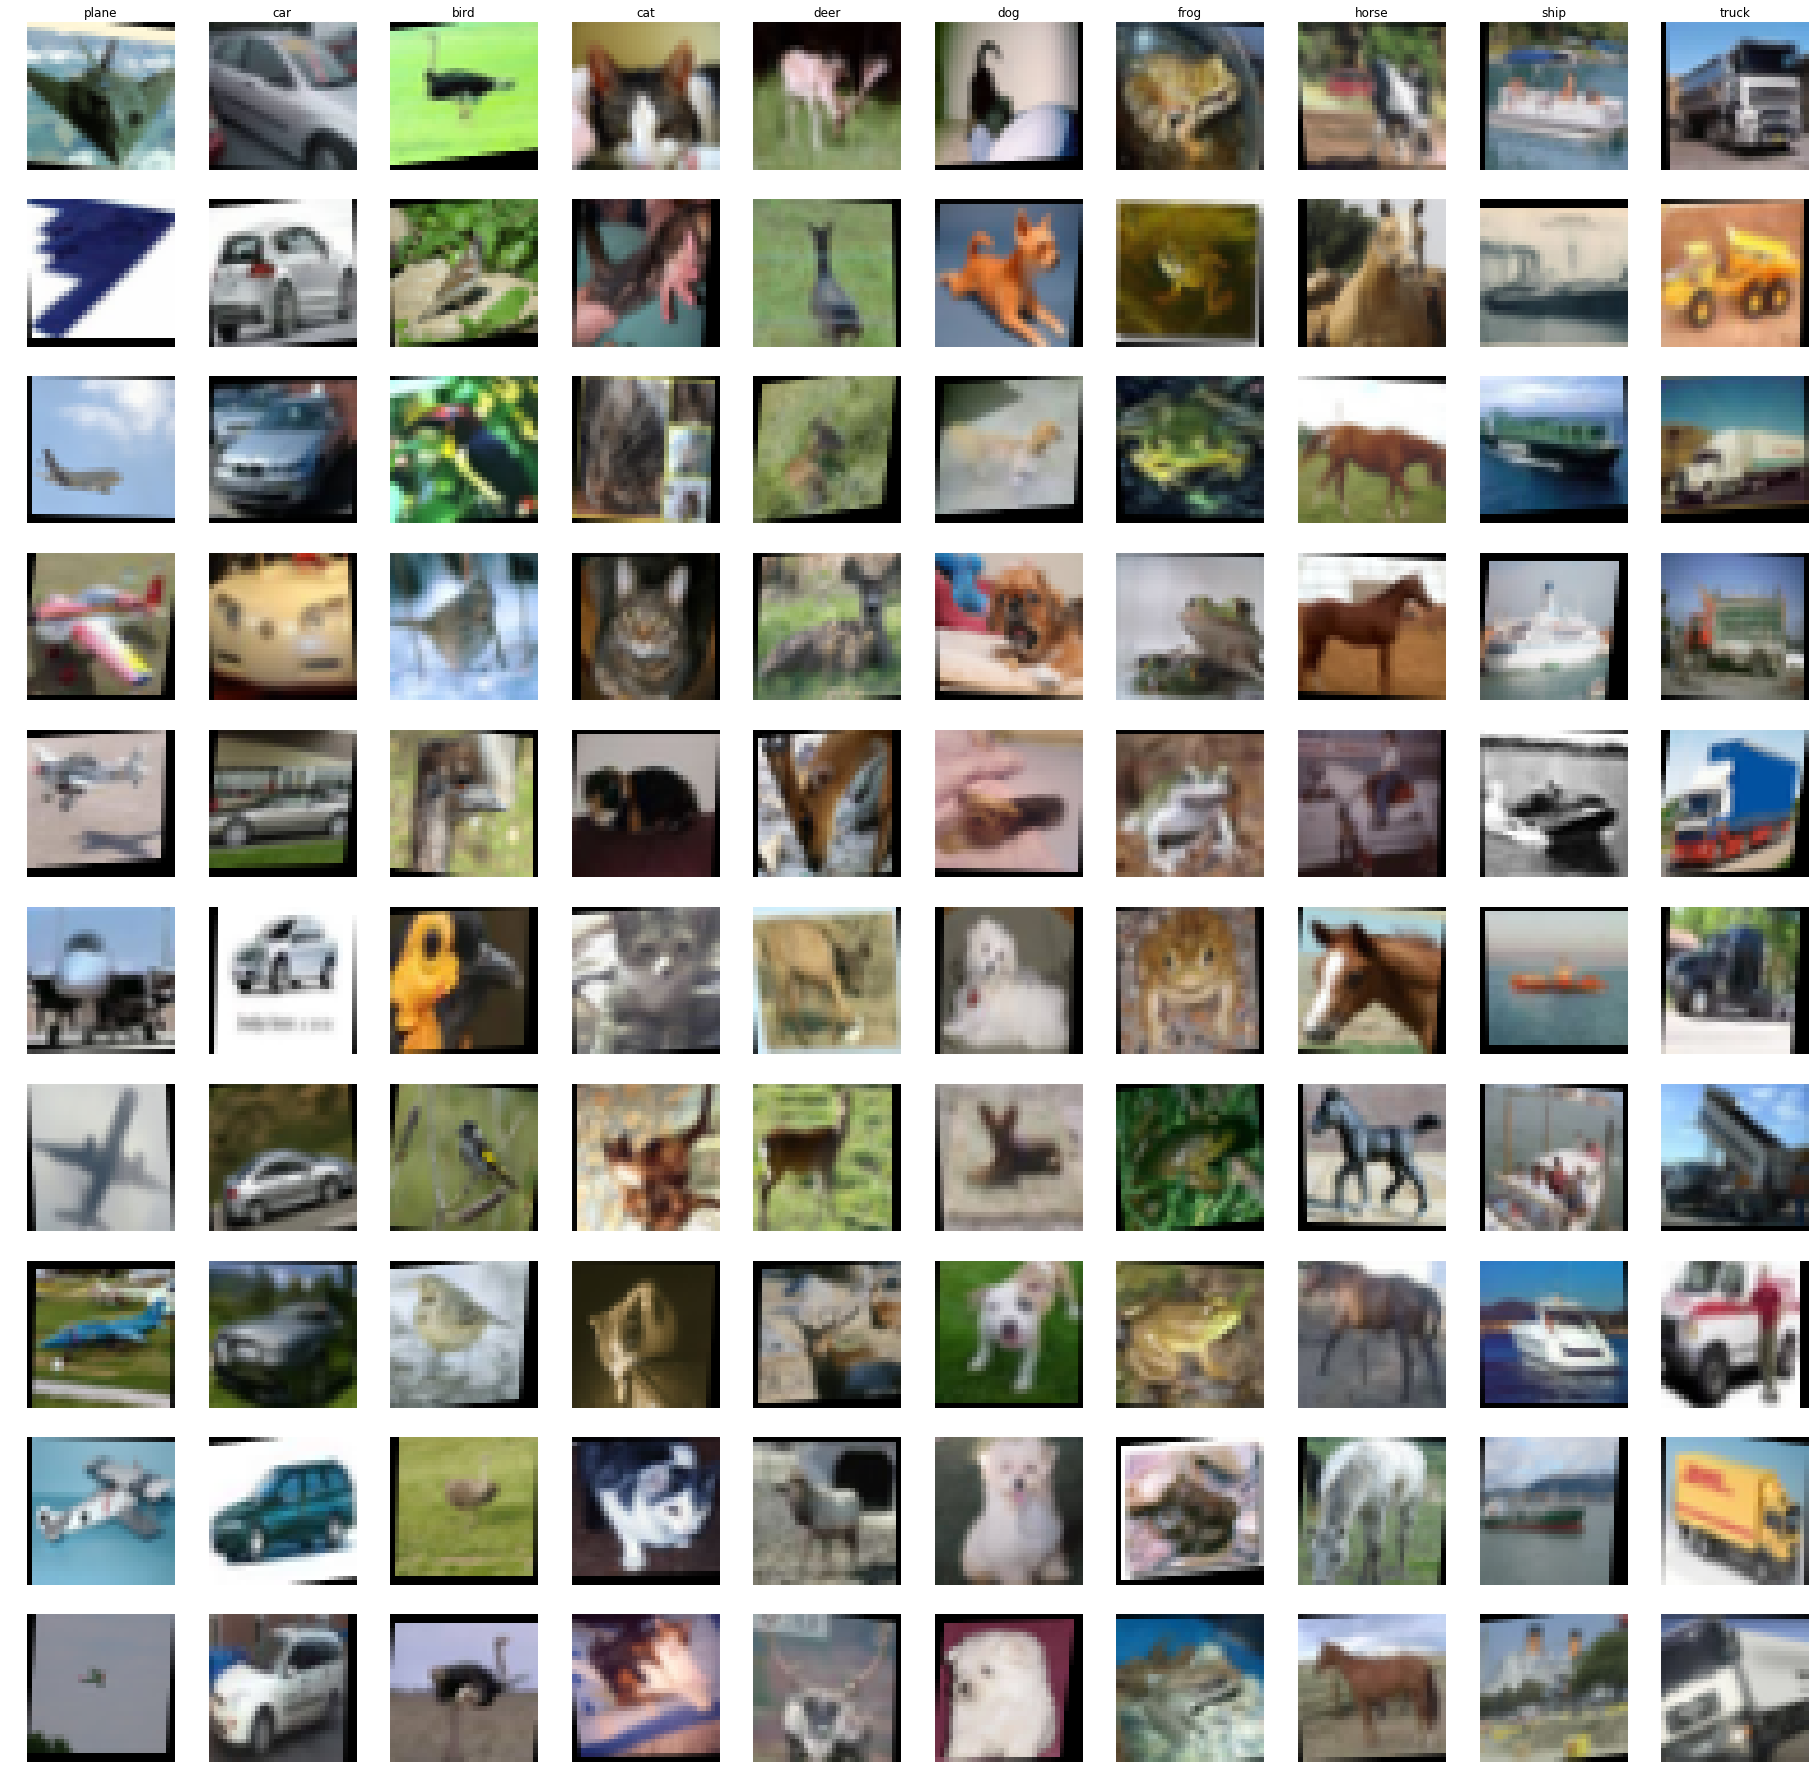

In [6]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine2/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取4）

In [7]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine4/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,4)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.64 s, sys: 348 ms, total: 4.99 s
Wall time: 4.97 s


total image number:  10000


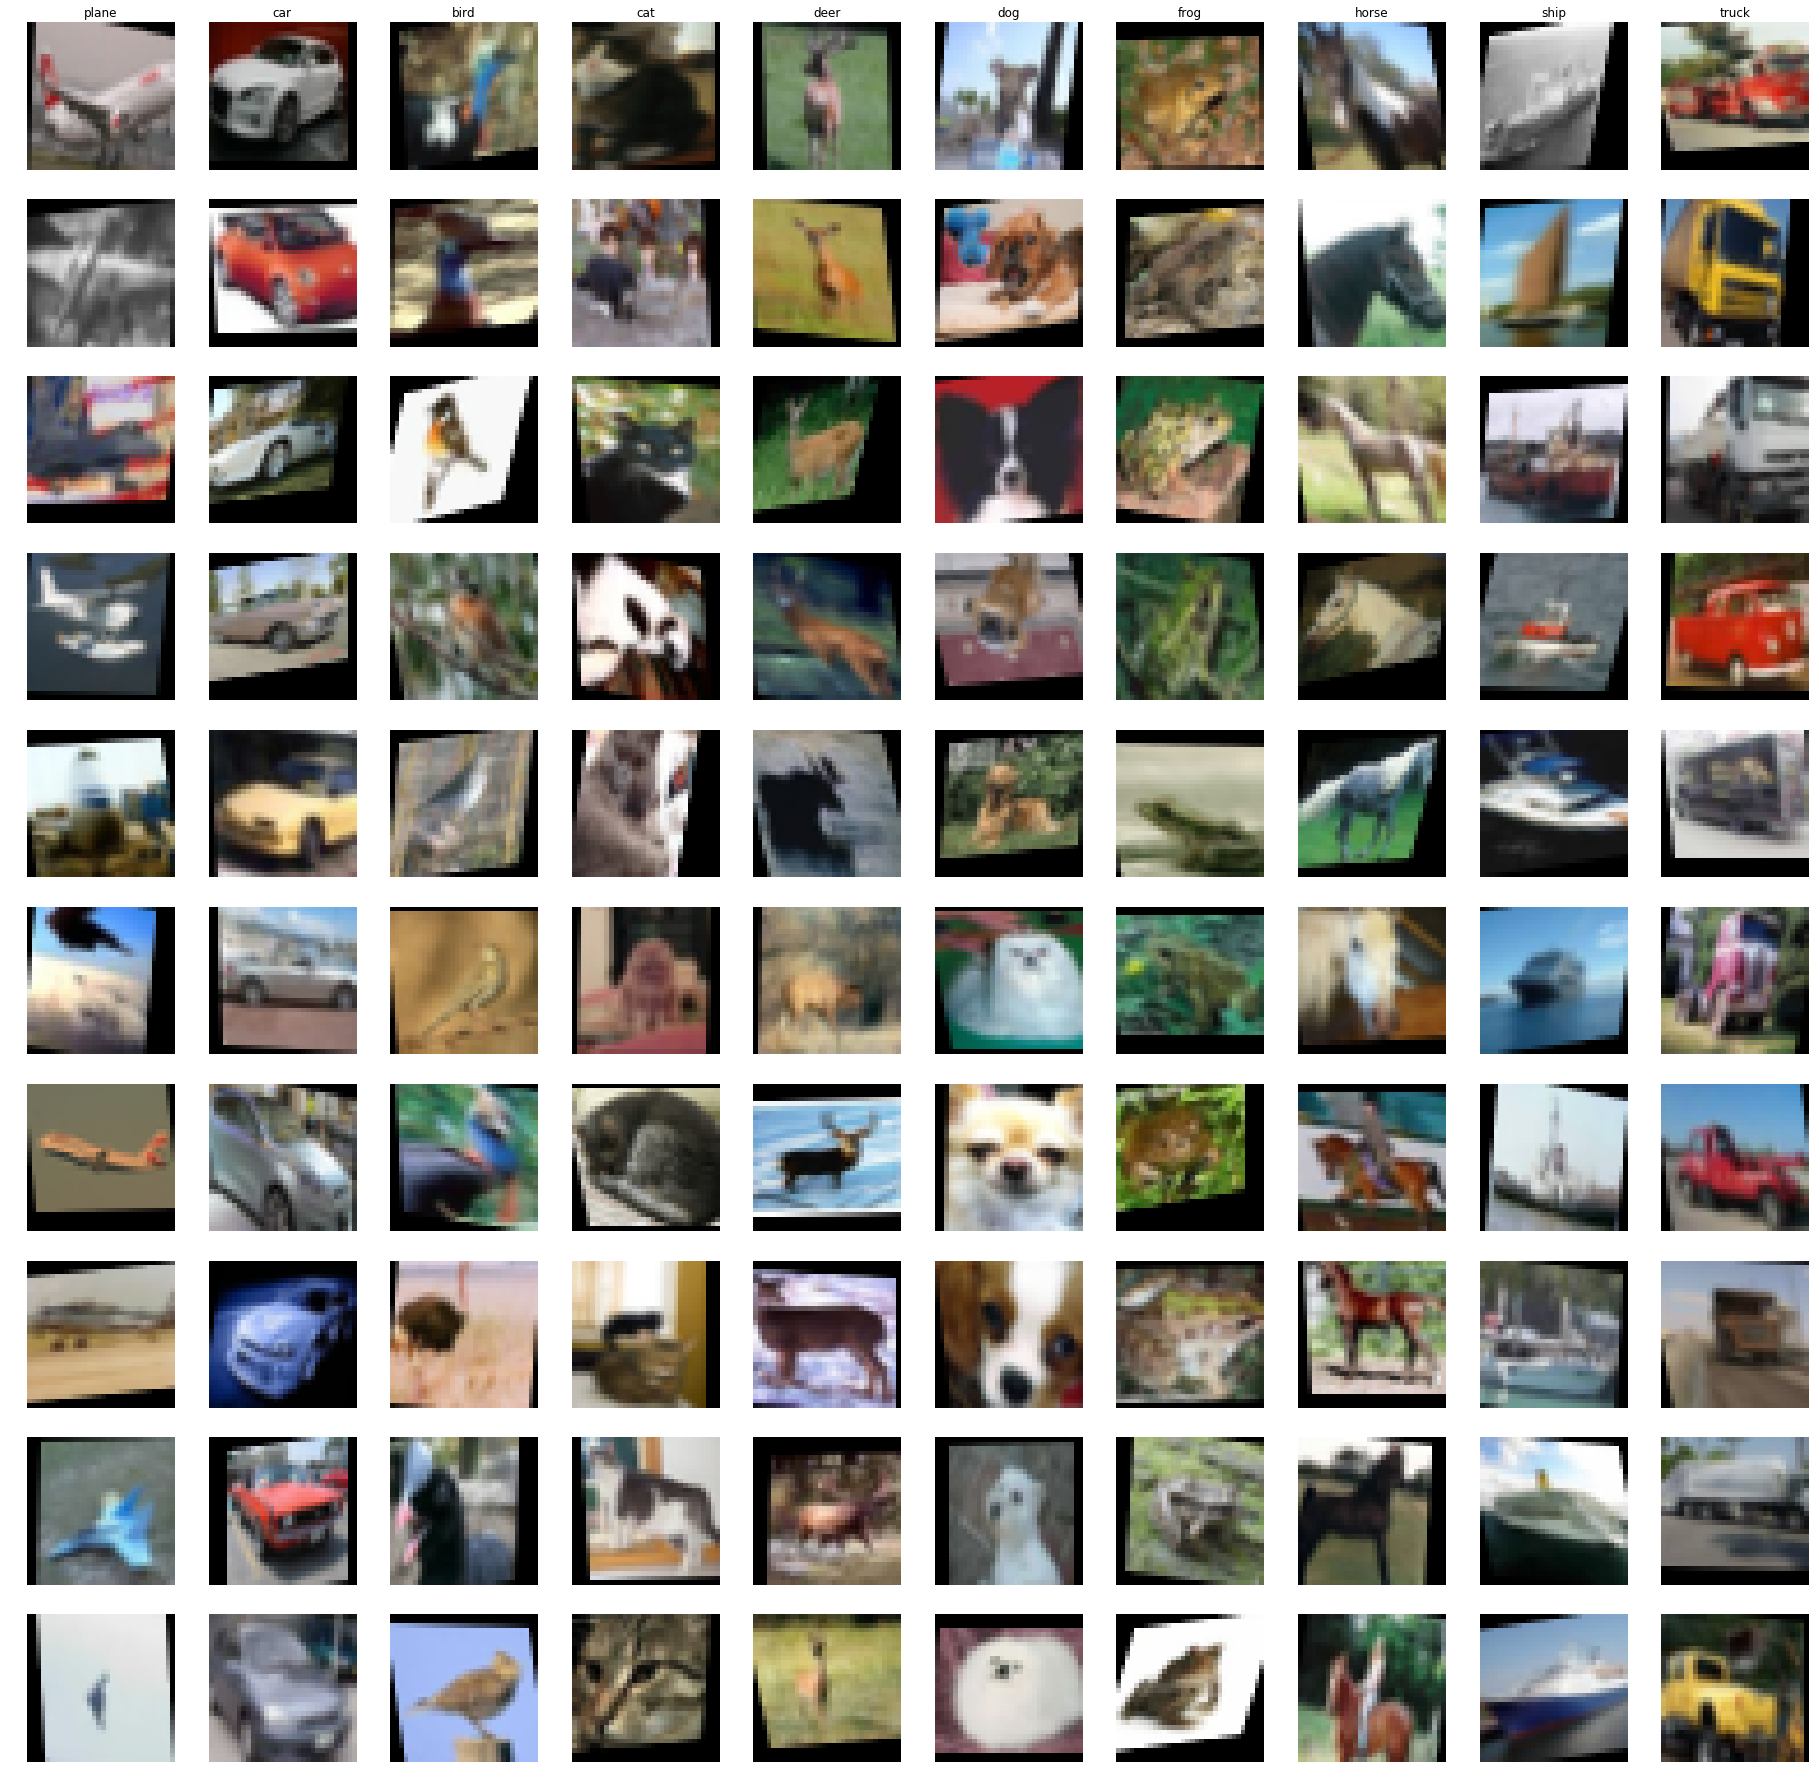

In [8]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取6）

In [9]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine6/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,6)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.94 s, sys: 292 ms, total: 5.23 s
Wall time: 5.24 s


total image number:  10000


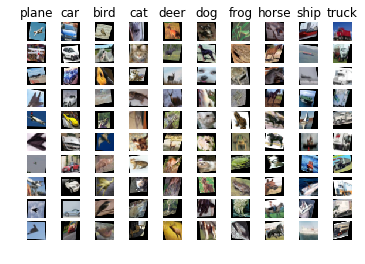

In [2]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine6/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取8）

In [11]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine8/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,8)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.7 s, sys: 320 ms, total: 5.02 s
Wall time: 5.01 s


total image number:  10000


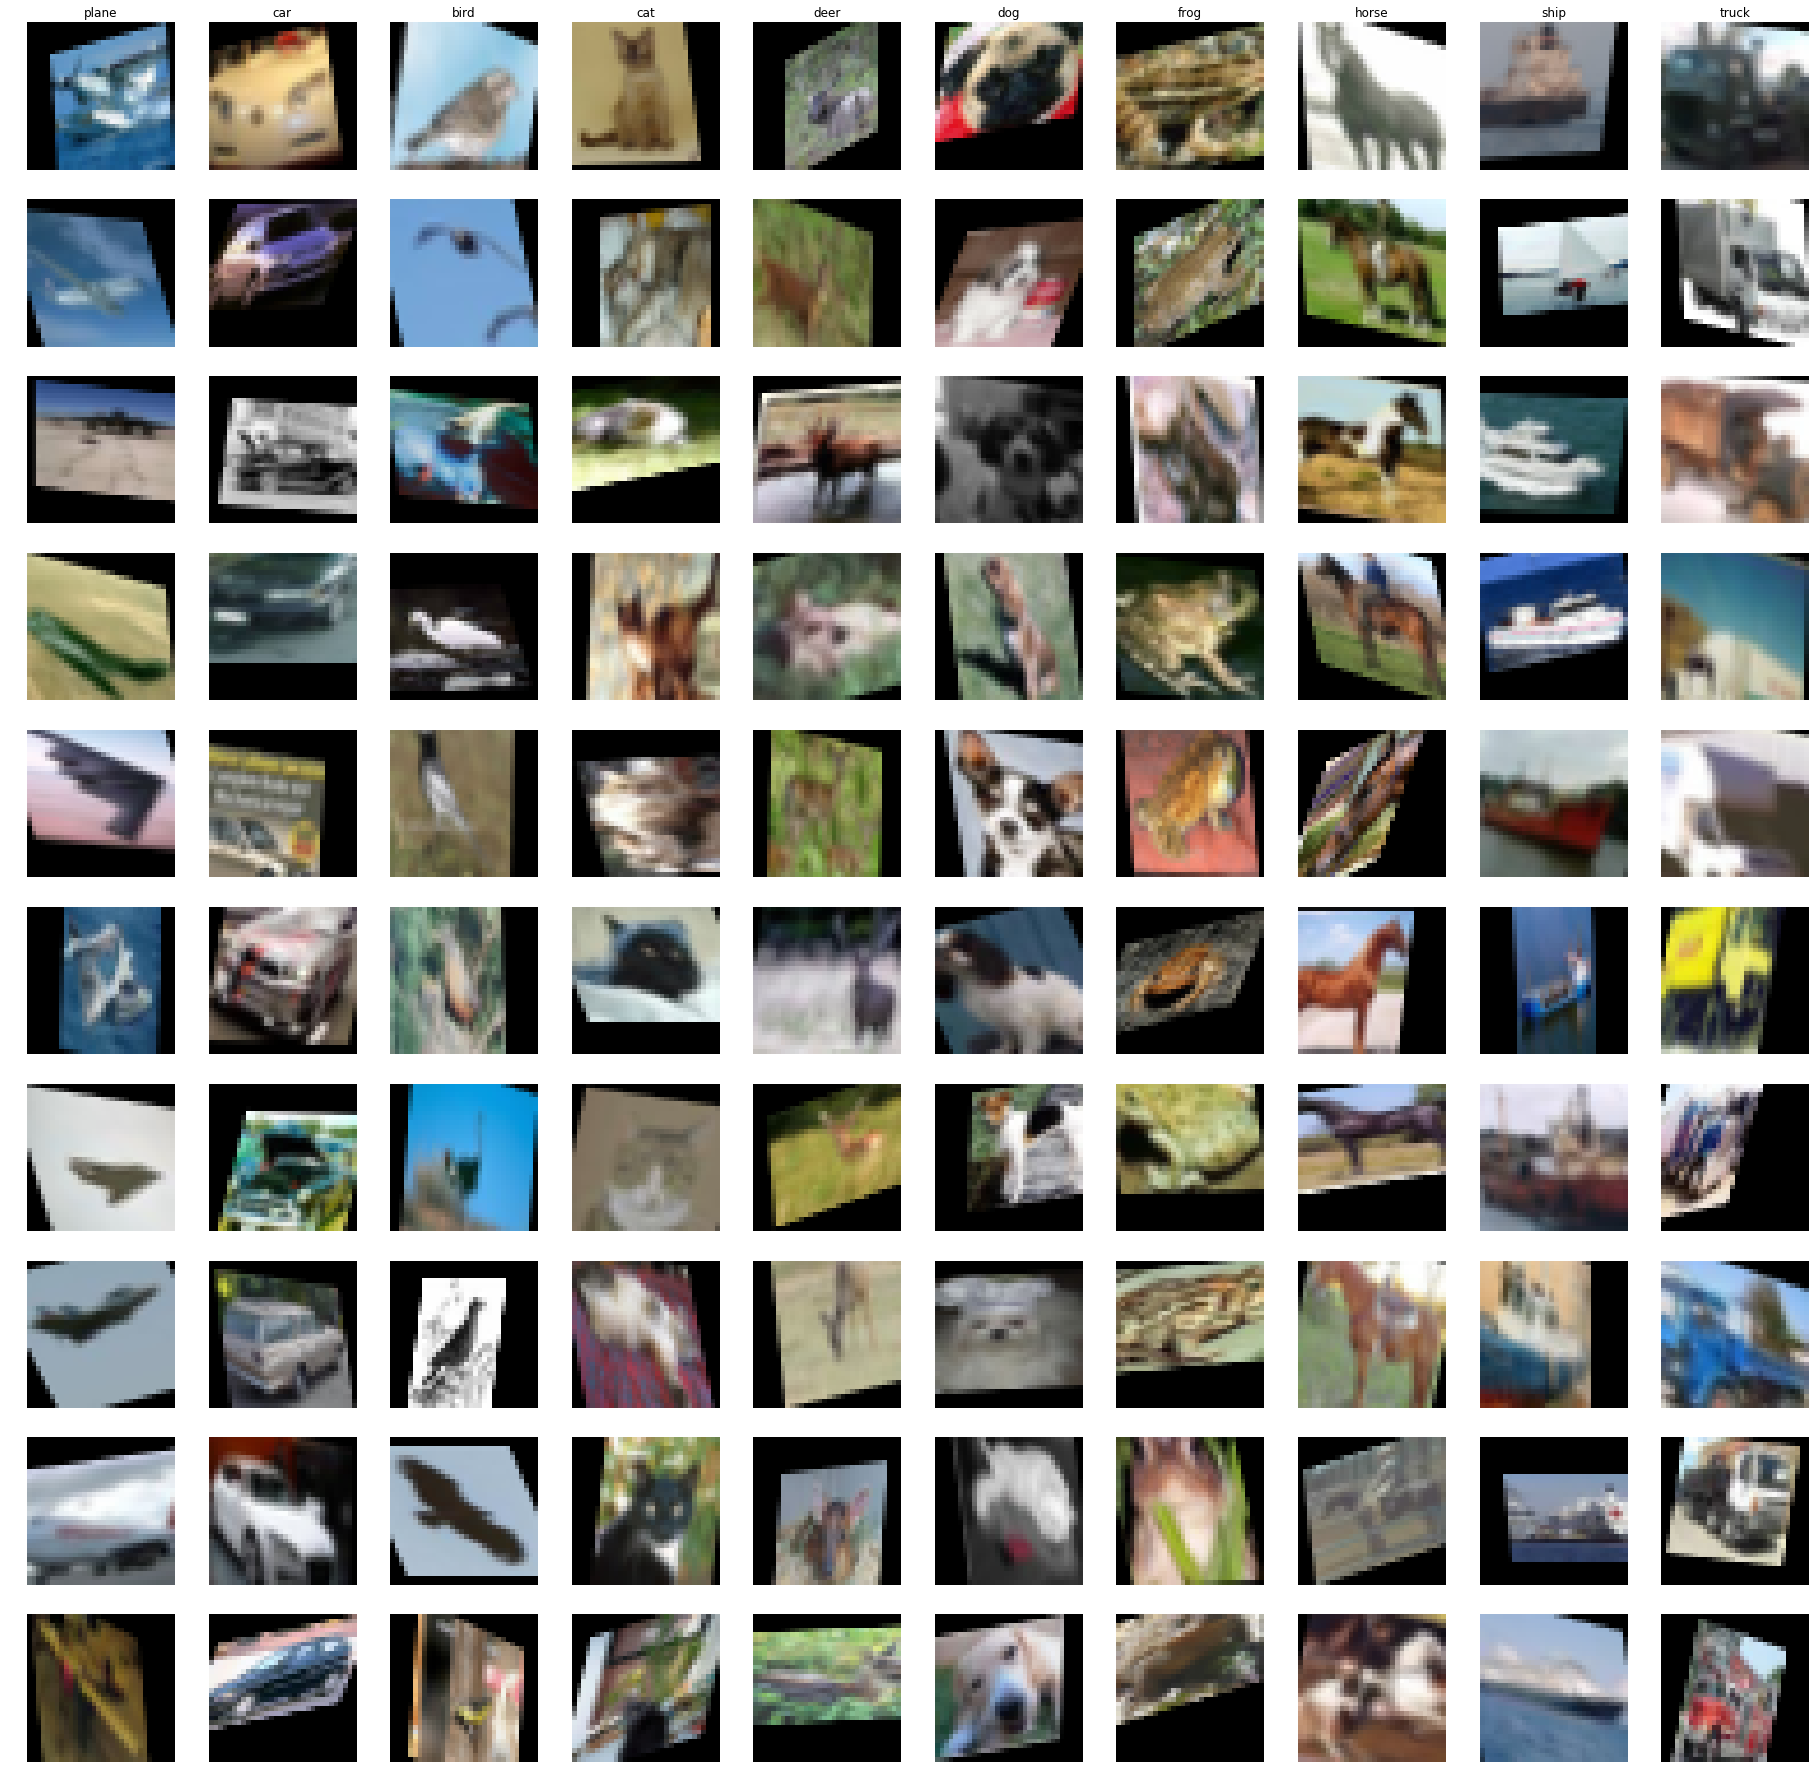

In [16]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine8/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取10）

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 2）

In [4]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit2/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,2)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 5.16 s, sys: 380 ms, total: 5.54 s
Wall time: 6.9 s


total image number:  10000


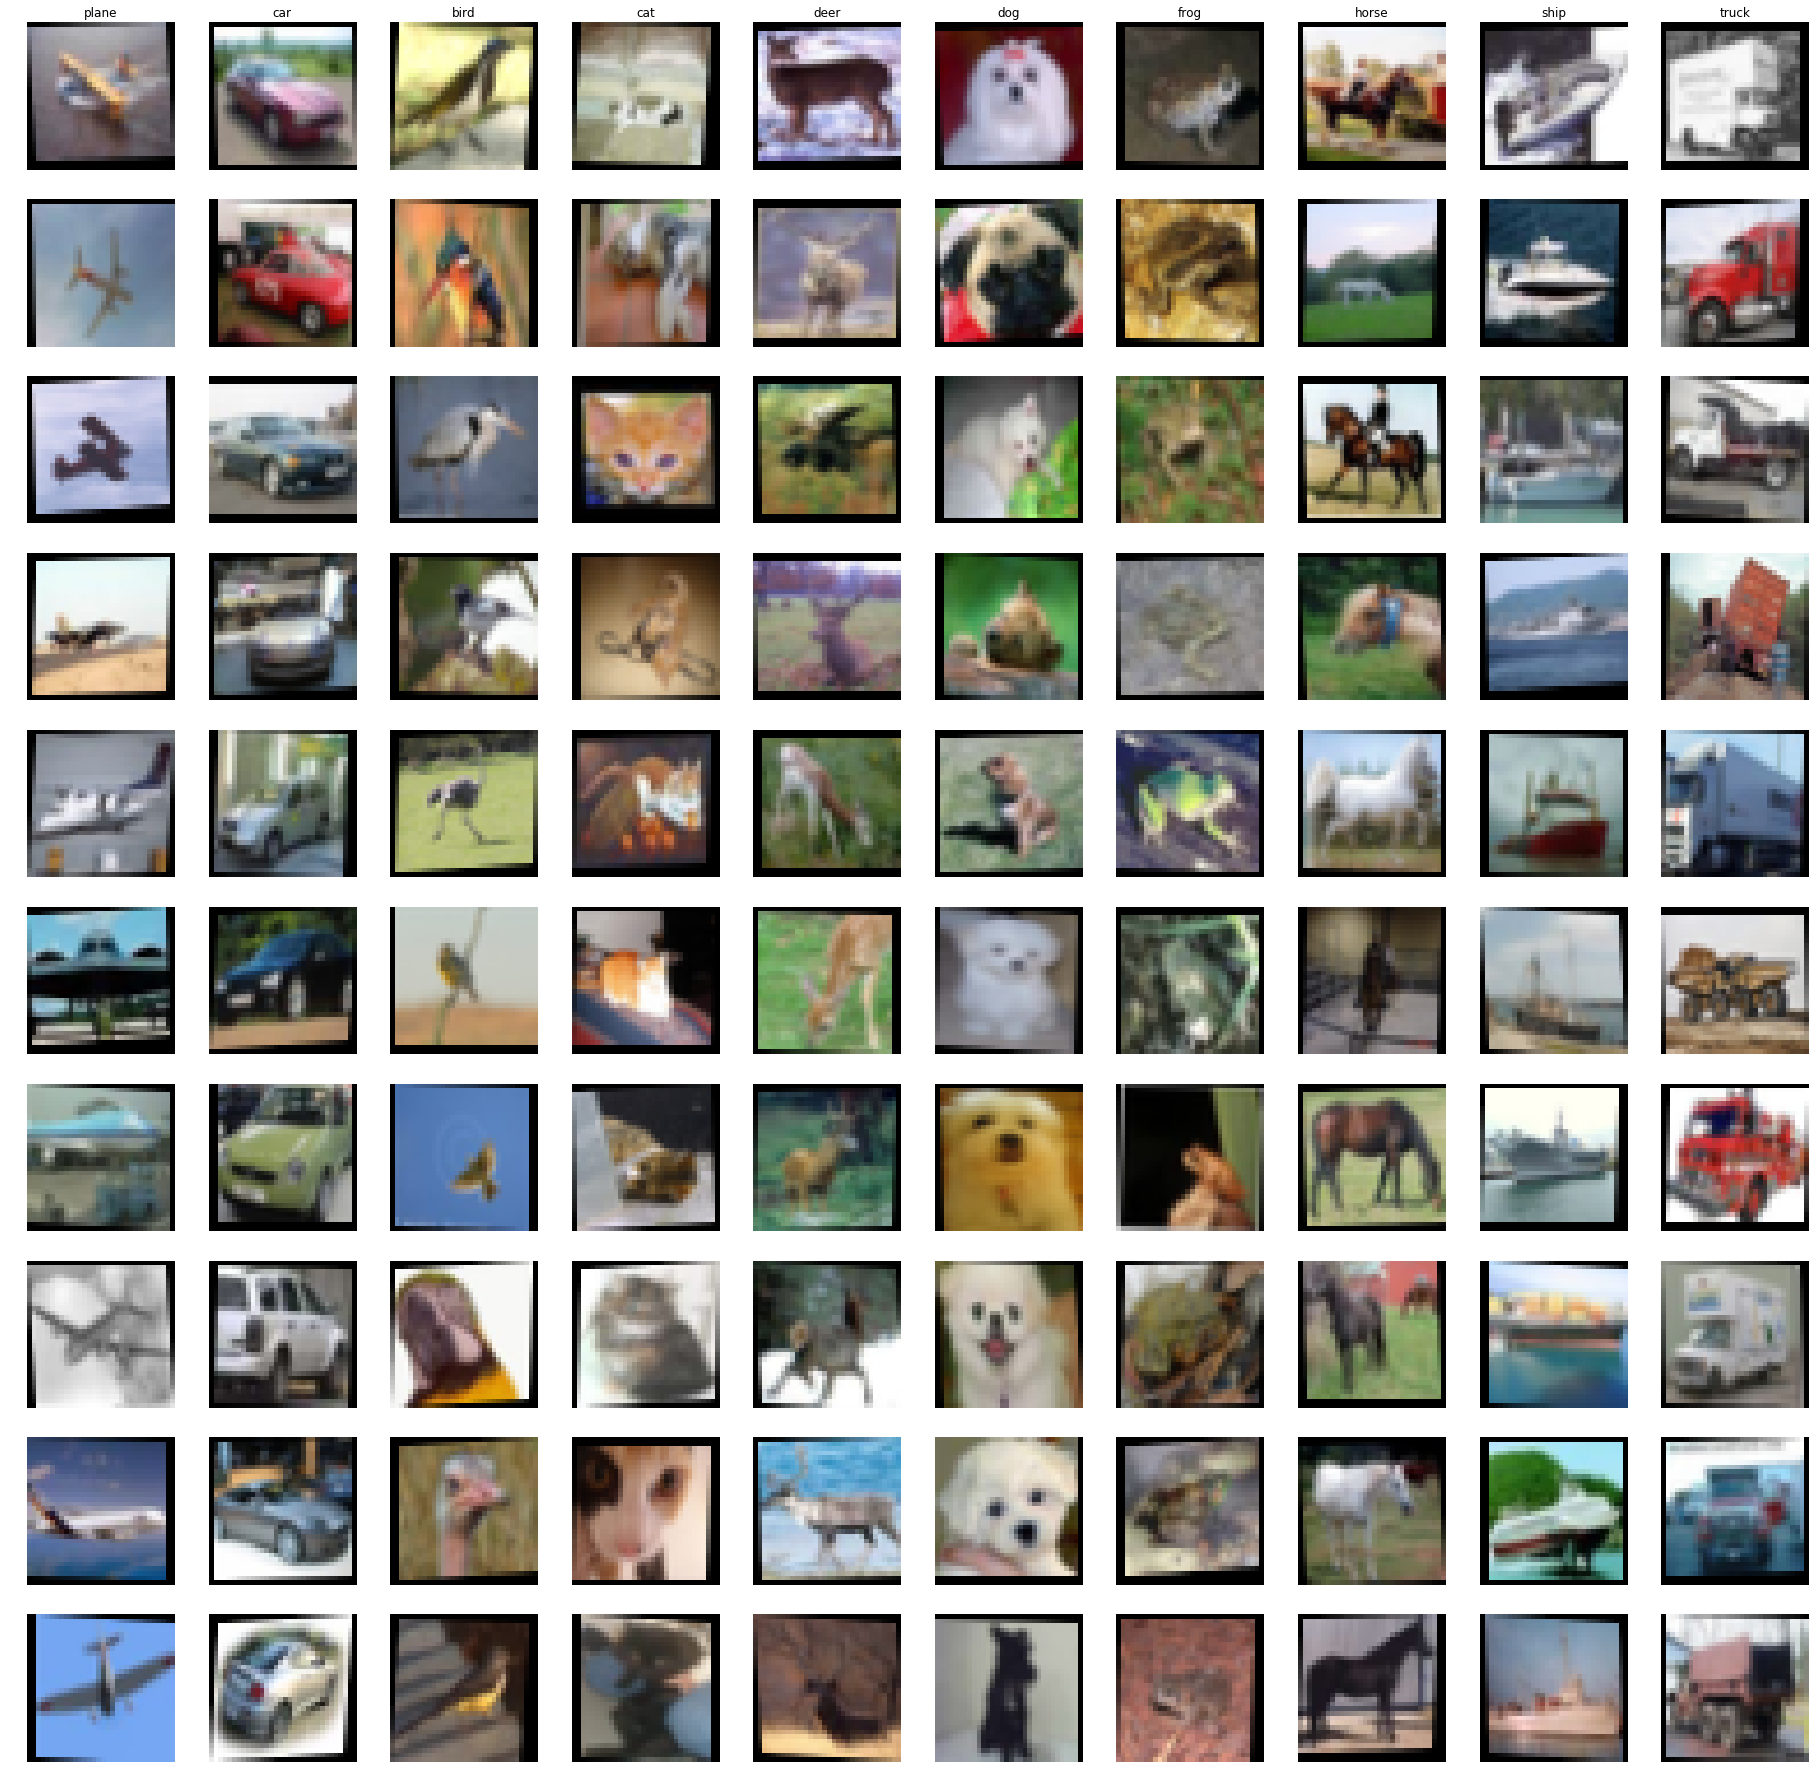

In [5]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit2//'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 4）

In [8]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit4/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,4)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.84 s, sys: 304 ms, total: 5.14 s
Wall time: 5.14 s


total image number:  10000


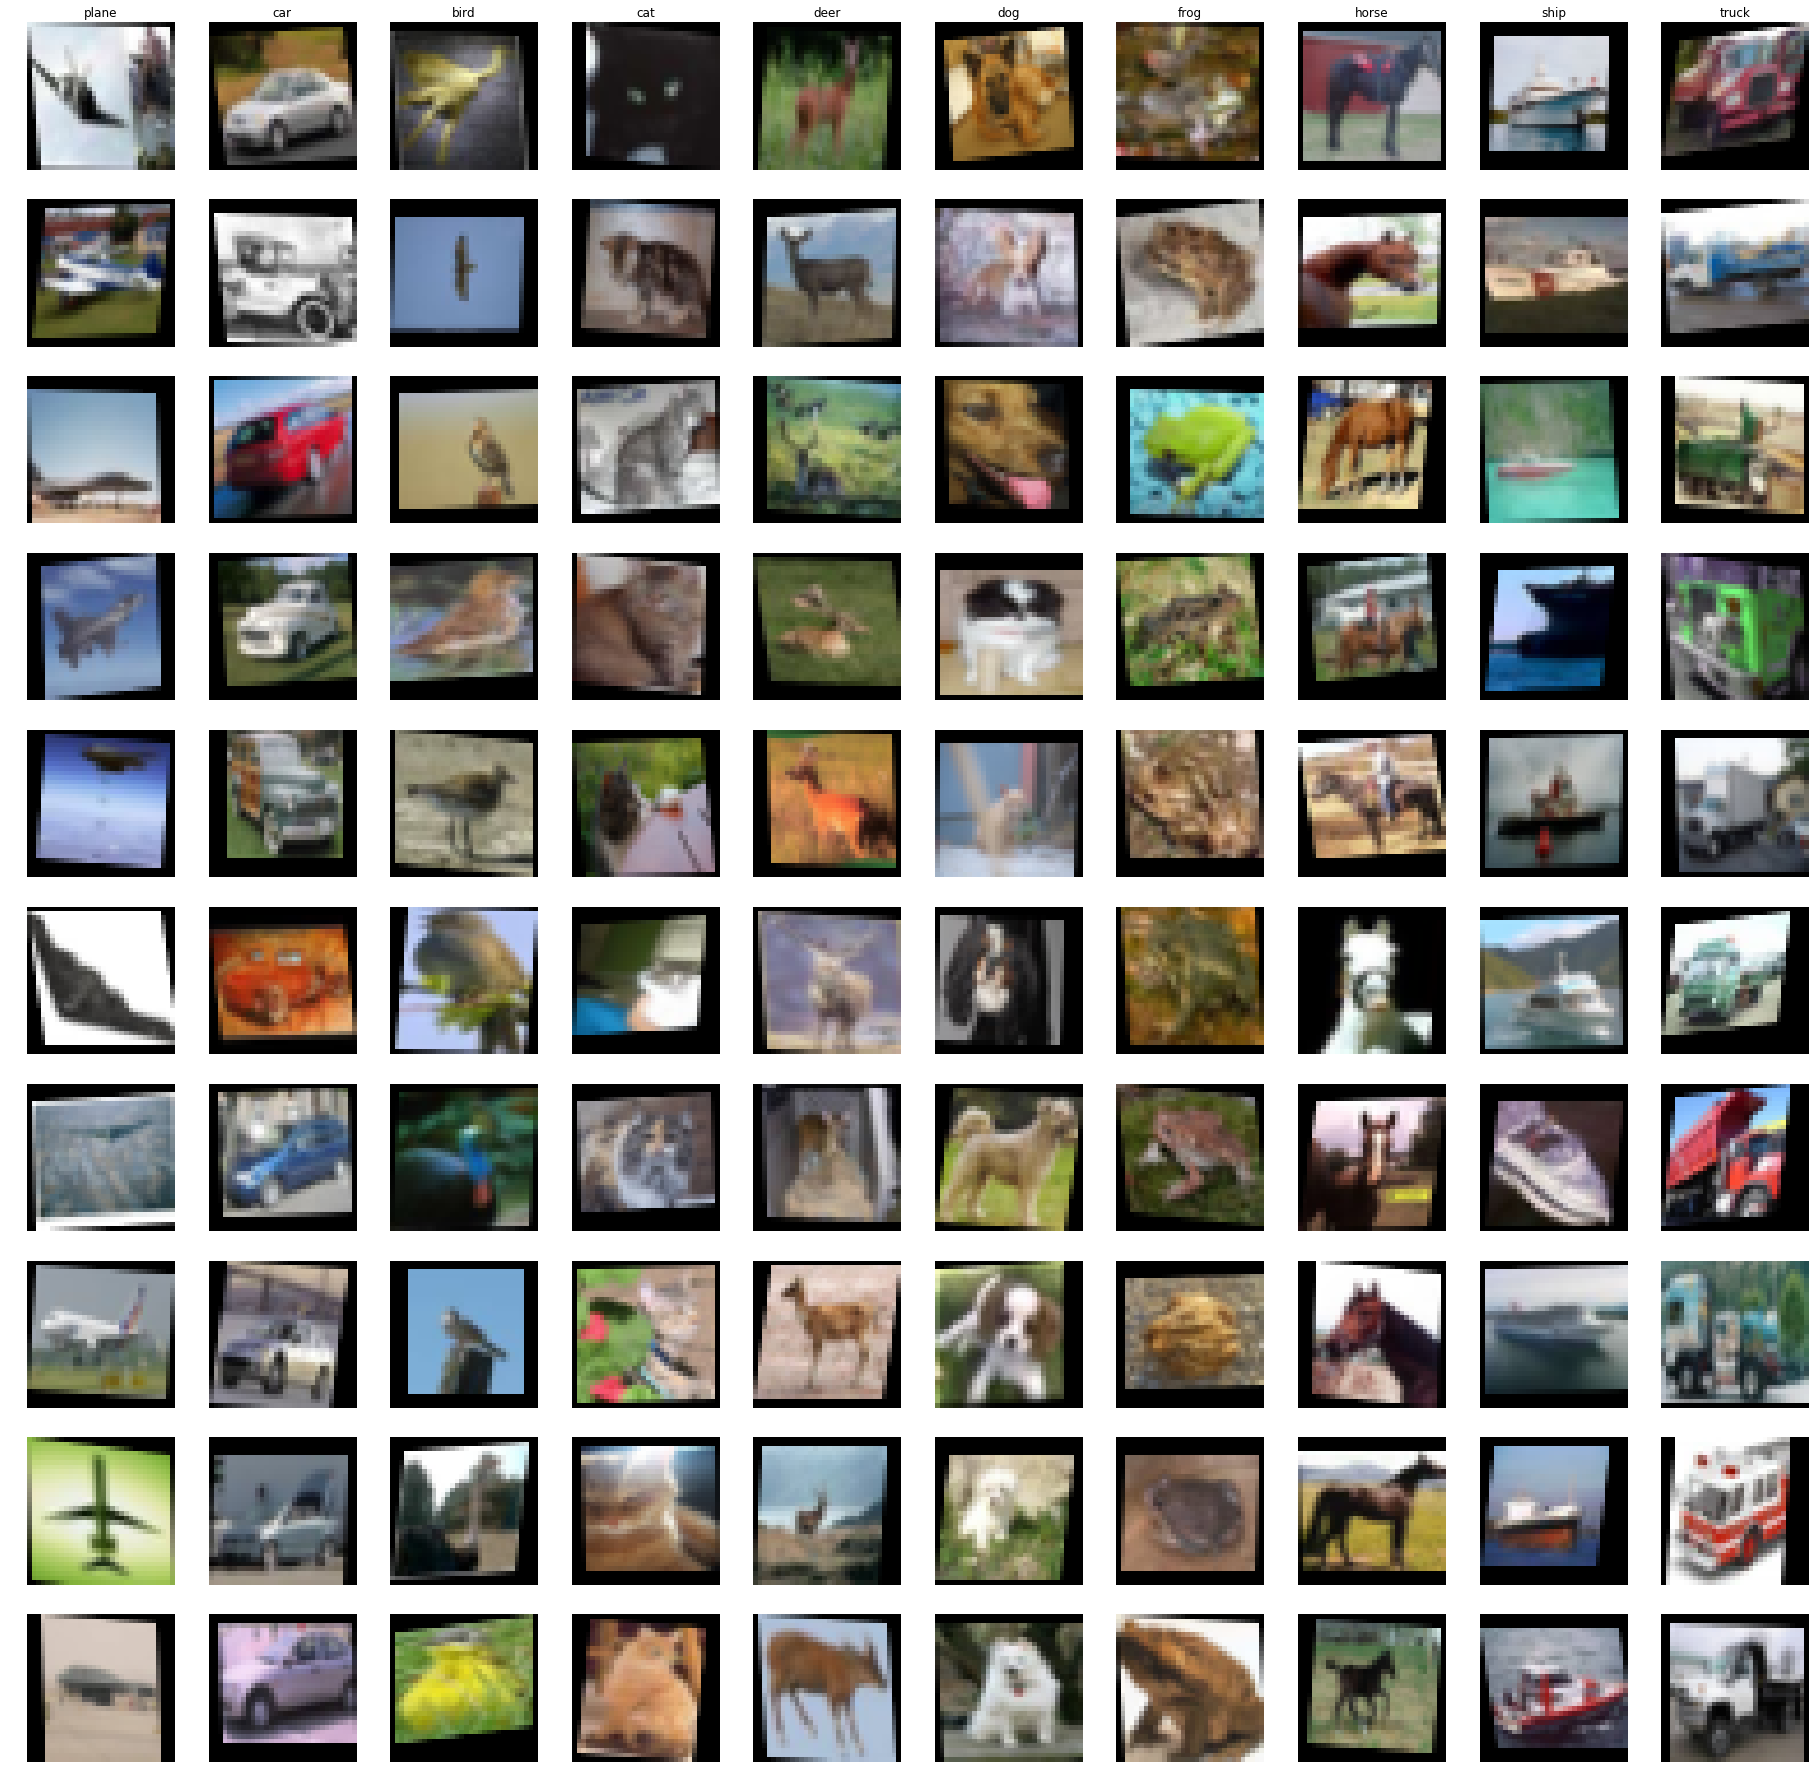

In [9]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 6）

In [10]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit6/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,6)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.9 s, sys: 284 ms, total: 5.18 s
Wall time: 5.21 s


total image number:  10000


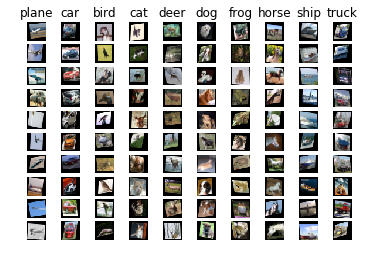

In [8]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit6/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 8）

In [12]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit8/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,8)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.68 s, sys: 272 ms, total: 4.95 s
Wall time: 4.94 s


total image number:  10000


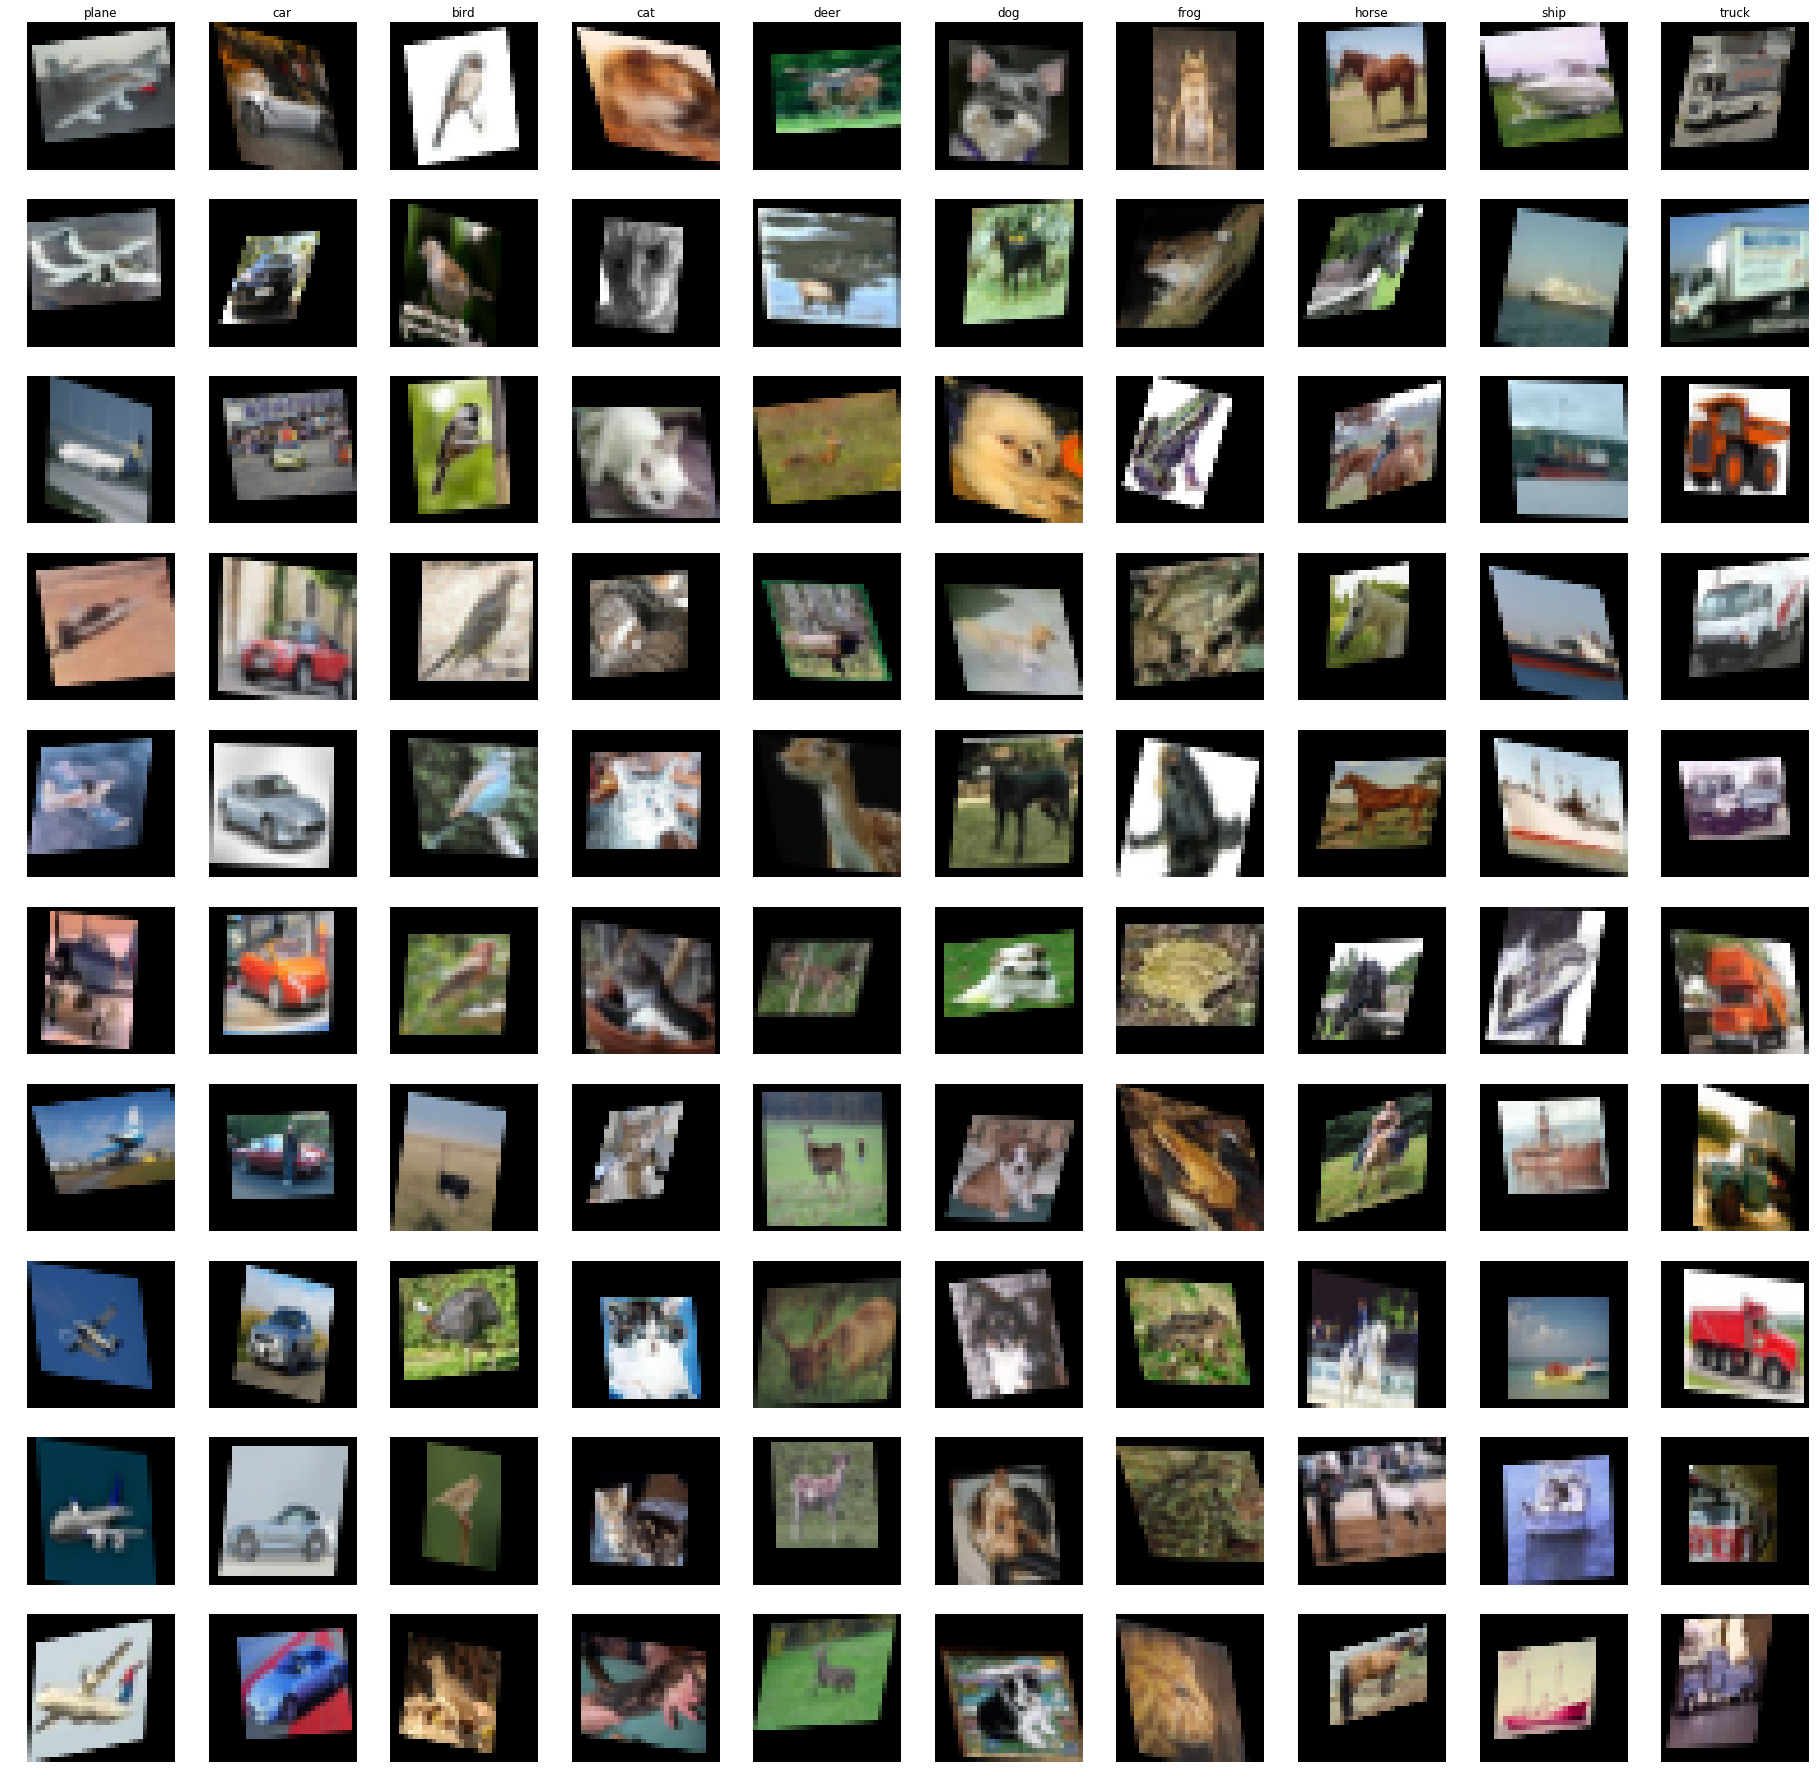

In [13]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit8/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 10）

In [14]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit10/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,10)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.7 s, sys: 292 ms, total: 4.99 s
Wall time: 4.97 s


total image number:  10000


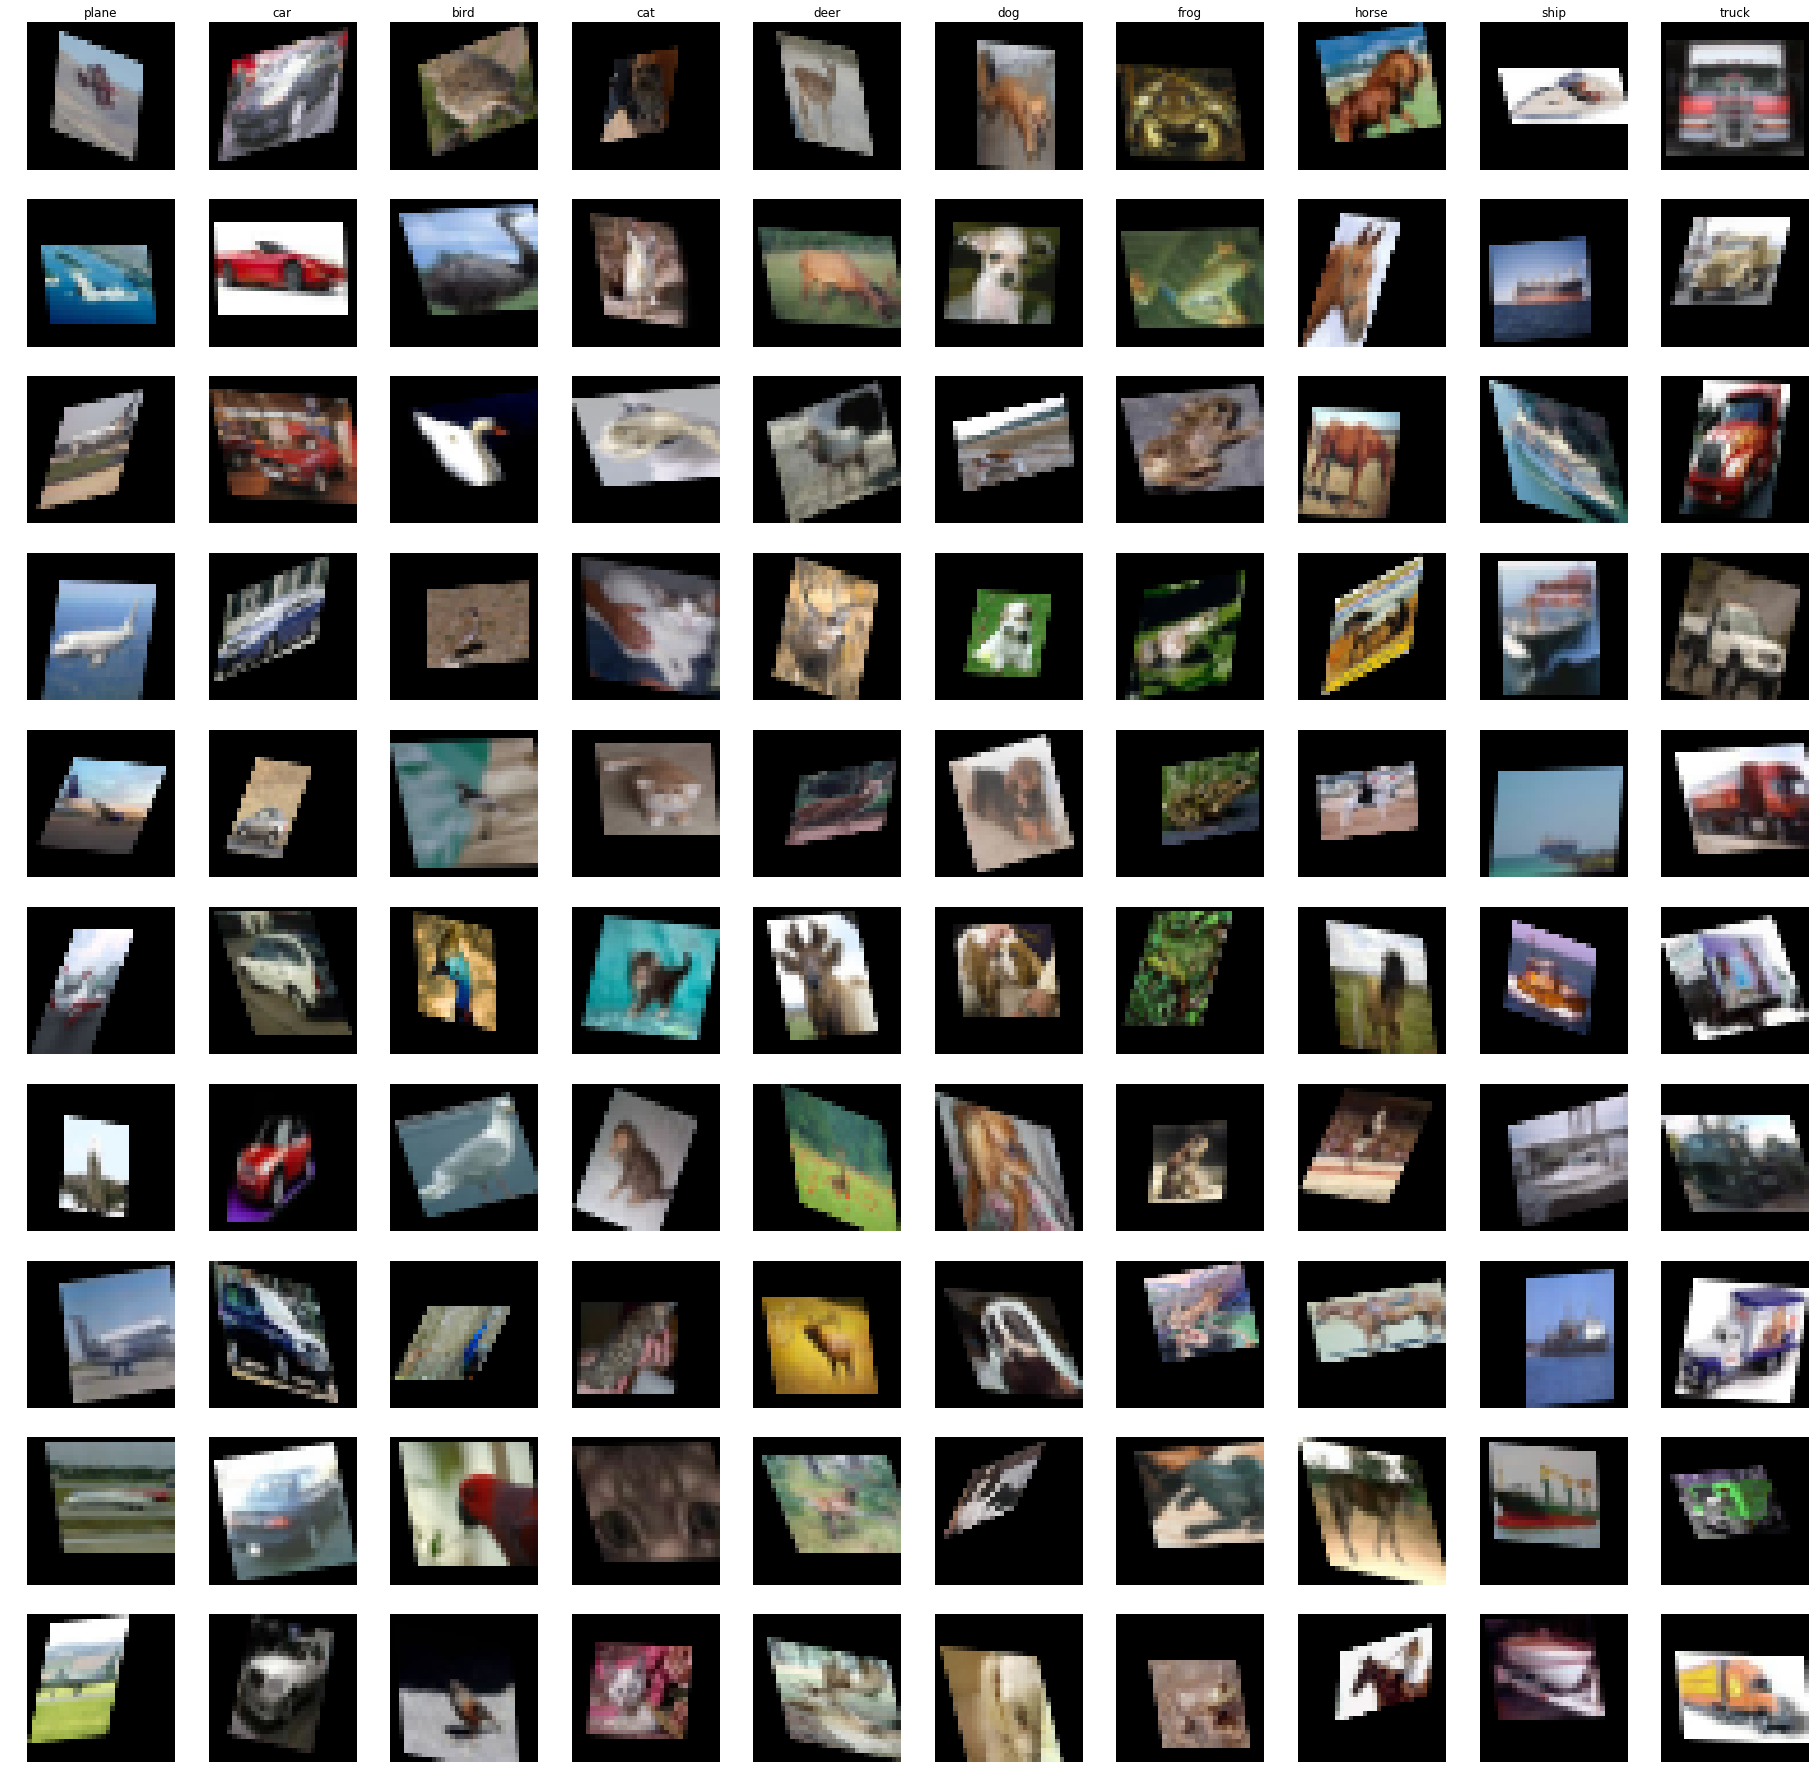

In [15]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit10/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对测试集（10,000）随机仿射变换，并保存在指定文件夹（limit 12）

In [16]:
%%time
## 对测试集随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始测试集（10,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/test/'
# 变换后测试集（10，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit12/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,12)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 4.77 s, sys: 248 ms, total: 5.02 s
Wall time: 5 s


total image number:  10000


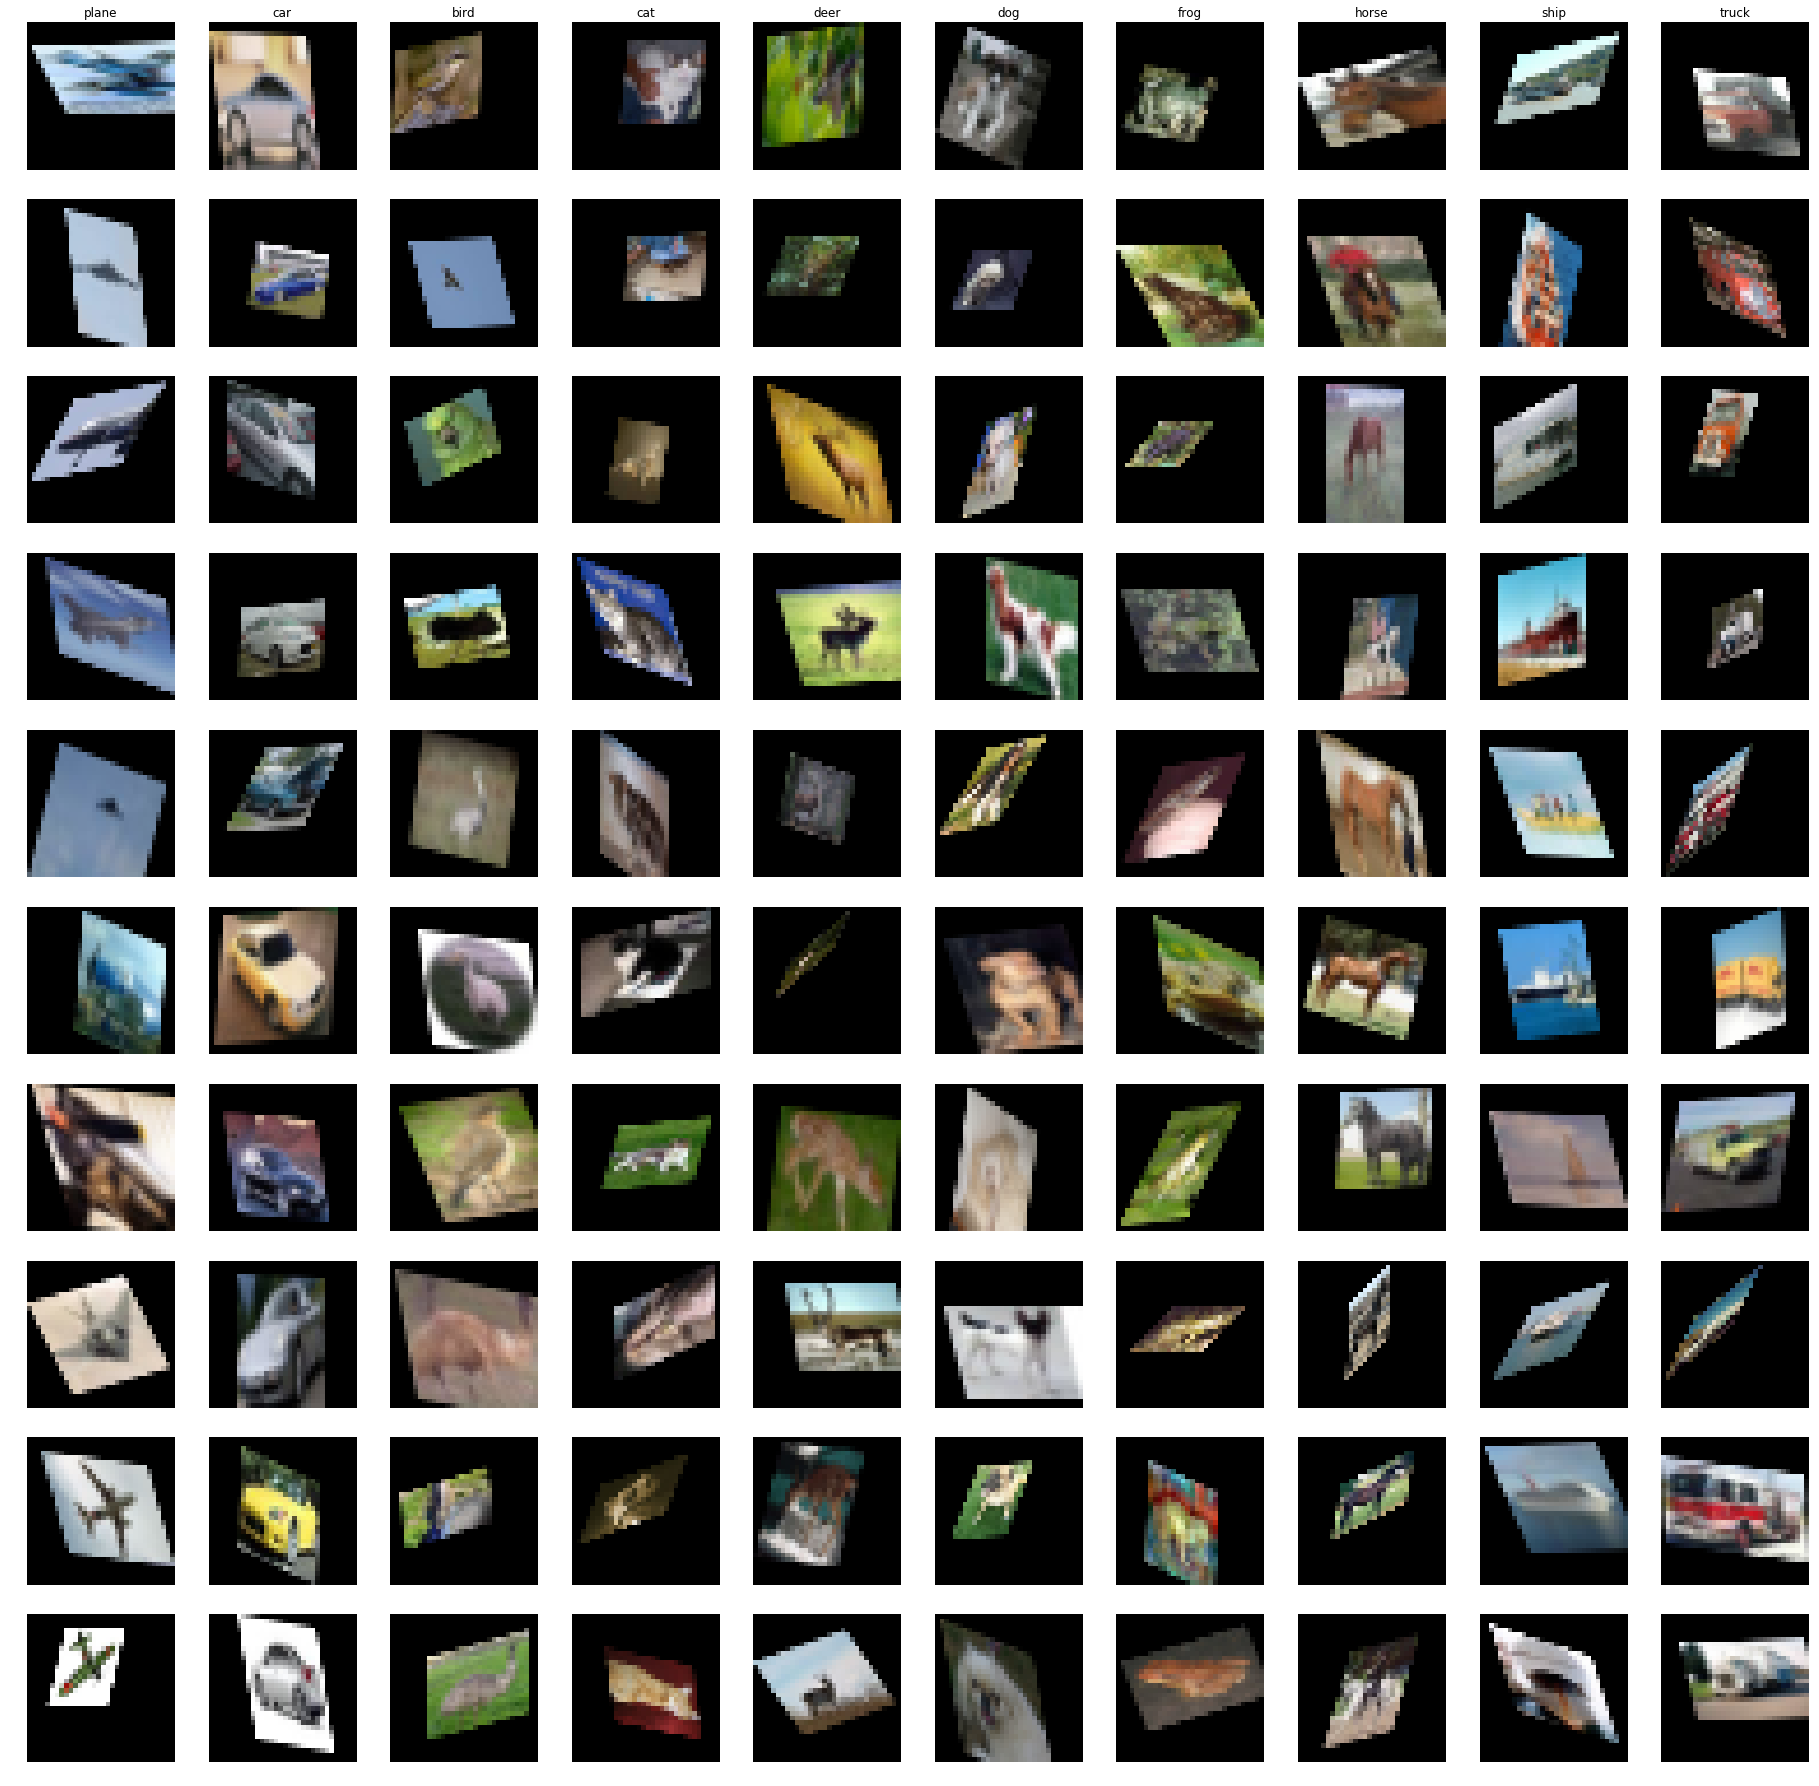

In [17]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/test_randomAffine_limit12/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取6）

In [6]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取6）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine6/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,6)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.46 s, sys: 260 ms, total: 2.72 s
Wall time: 3.58 s


total image number:  5000


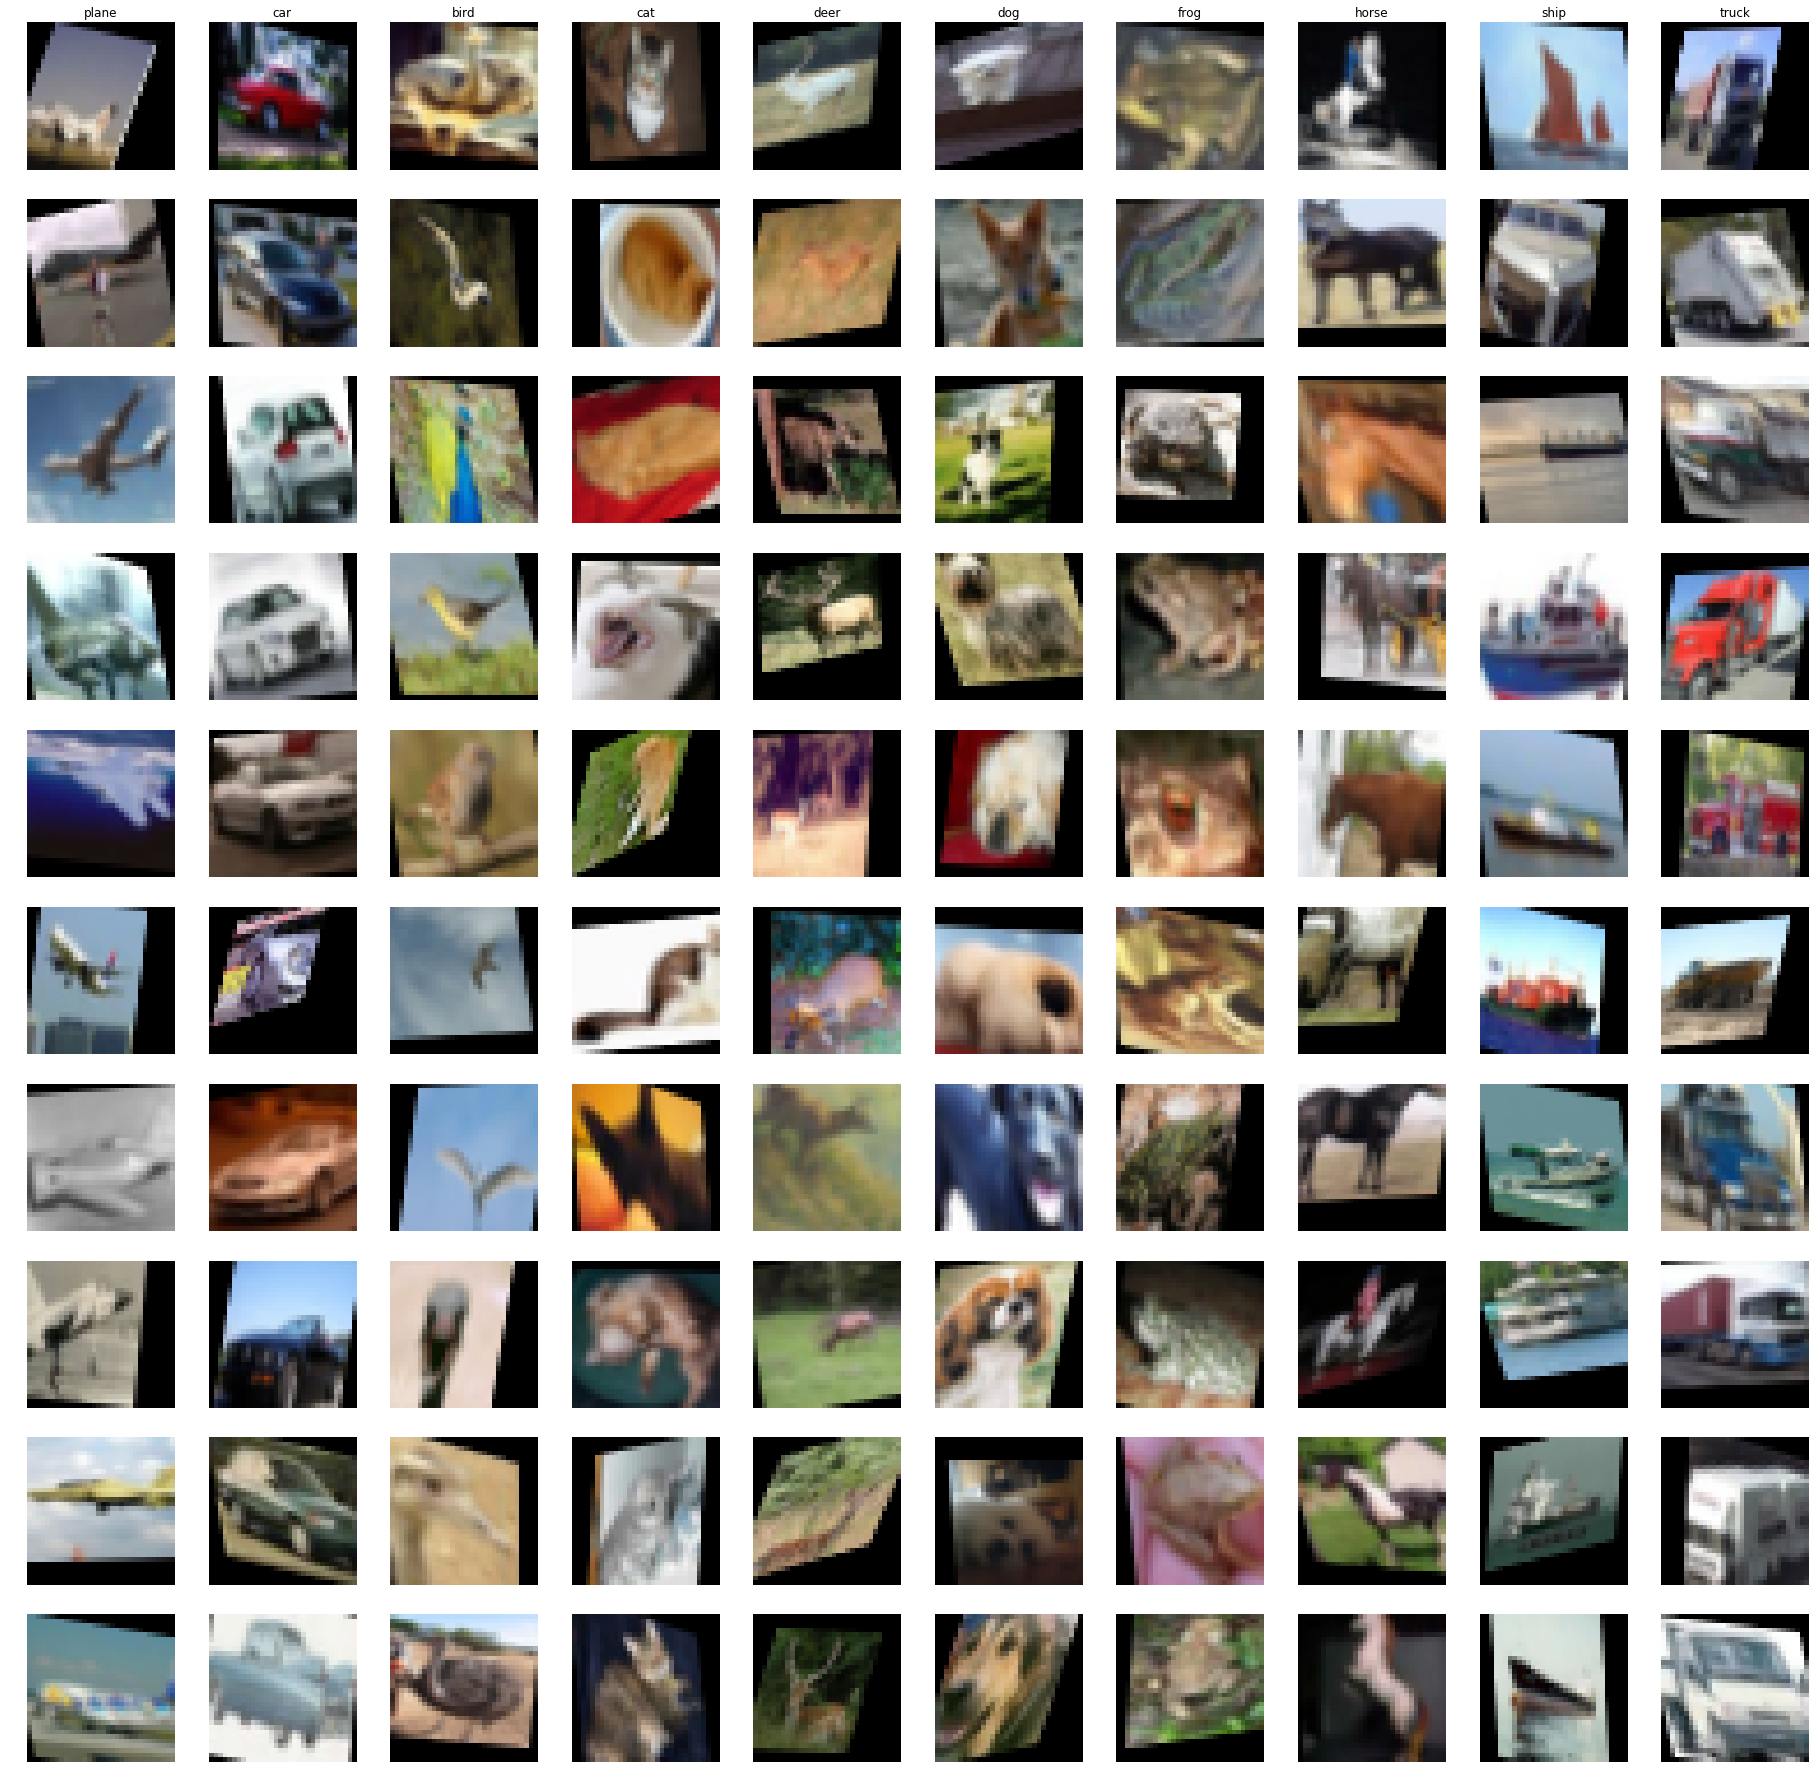

In [15]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine6/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

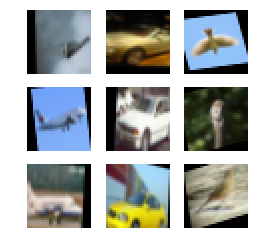

In [9]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine6/'
# print 'total image number: ', get_img_num(file_out_path)
random_show_specified_cifar10(file_out_path)

### 对yanzheng集（10,000）随机仿射变换，并保存在指定文件夹（最大偏移量取10）

In [5]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取6）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine10/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,10)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.46 s, sys: 224 ms, total: 2.69 s
Wall time: 3.51 s


total image number:  5000


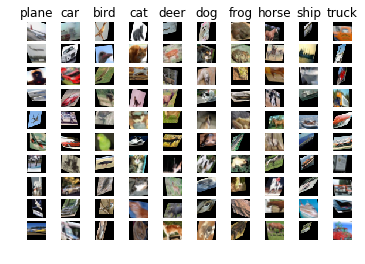

In [7]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine10/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取2）

In [8]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine2/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,2)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.38 s, sys: 156 ms, total: 2.53 s
Wall time: 2.62 s


total image number:  5000


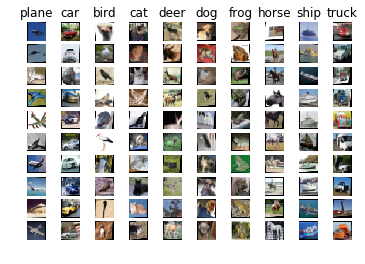

In [9]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine2/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取4）

In [10]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine4/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,4)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.29 s, sys: 132 ms, total: 2.42 s
Wall time: 2.43 s


total image number:  5000


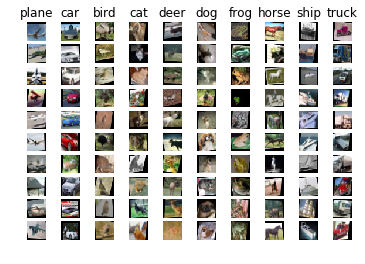

In [11]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取4, train_valid_with_rat4）

In [4]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_with_rat4/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,max_delta_pix=4,flag=1)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 3.77 s, sys: 288 ms, total: 4.06 s
Wall time: 4.96 s


 total image number:  10000


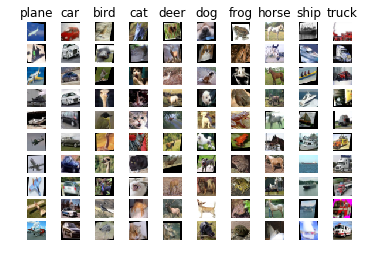

In [6]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_with_rat4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取8）

In [12]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine8/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,8)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.32 s, sys: 168 ms, total: 2.48 s
Wall time: 2.48 s


total image number:  5000


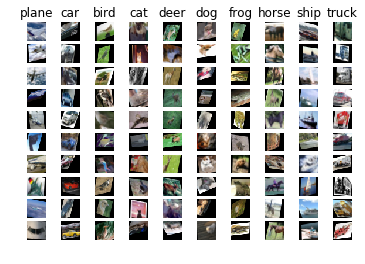

In [13]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine8/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取2, limit）

In [5]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit2/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,2)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.53 s, sys: 208 ms, total: 2.74 s
Wall time: 3.53 s


total image number:  5000


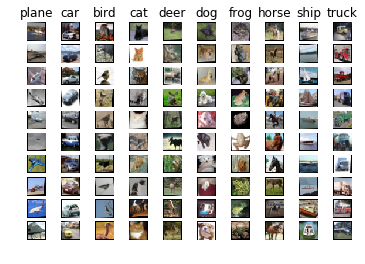

In [6]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit2/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取4, limit）

In [7]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit4/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,4)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.31 s, sys: 176 ms, total: 2.49 s
Wall time: 2.48 s


total image number:  5000


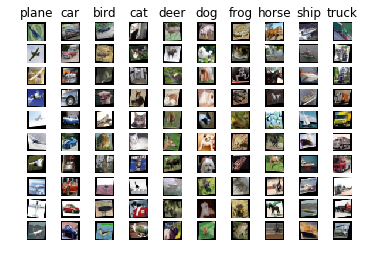

In [8]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit4/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取6, limit）

In [9]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit6/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,6)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.4 s, sys: 144 ms, total: 2.54 s
Wall time: 2.54 s


total image number:  5000


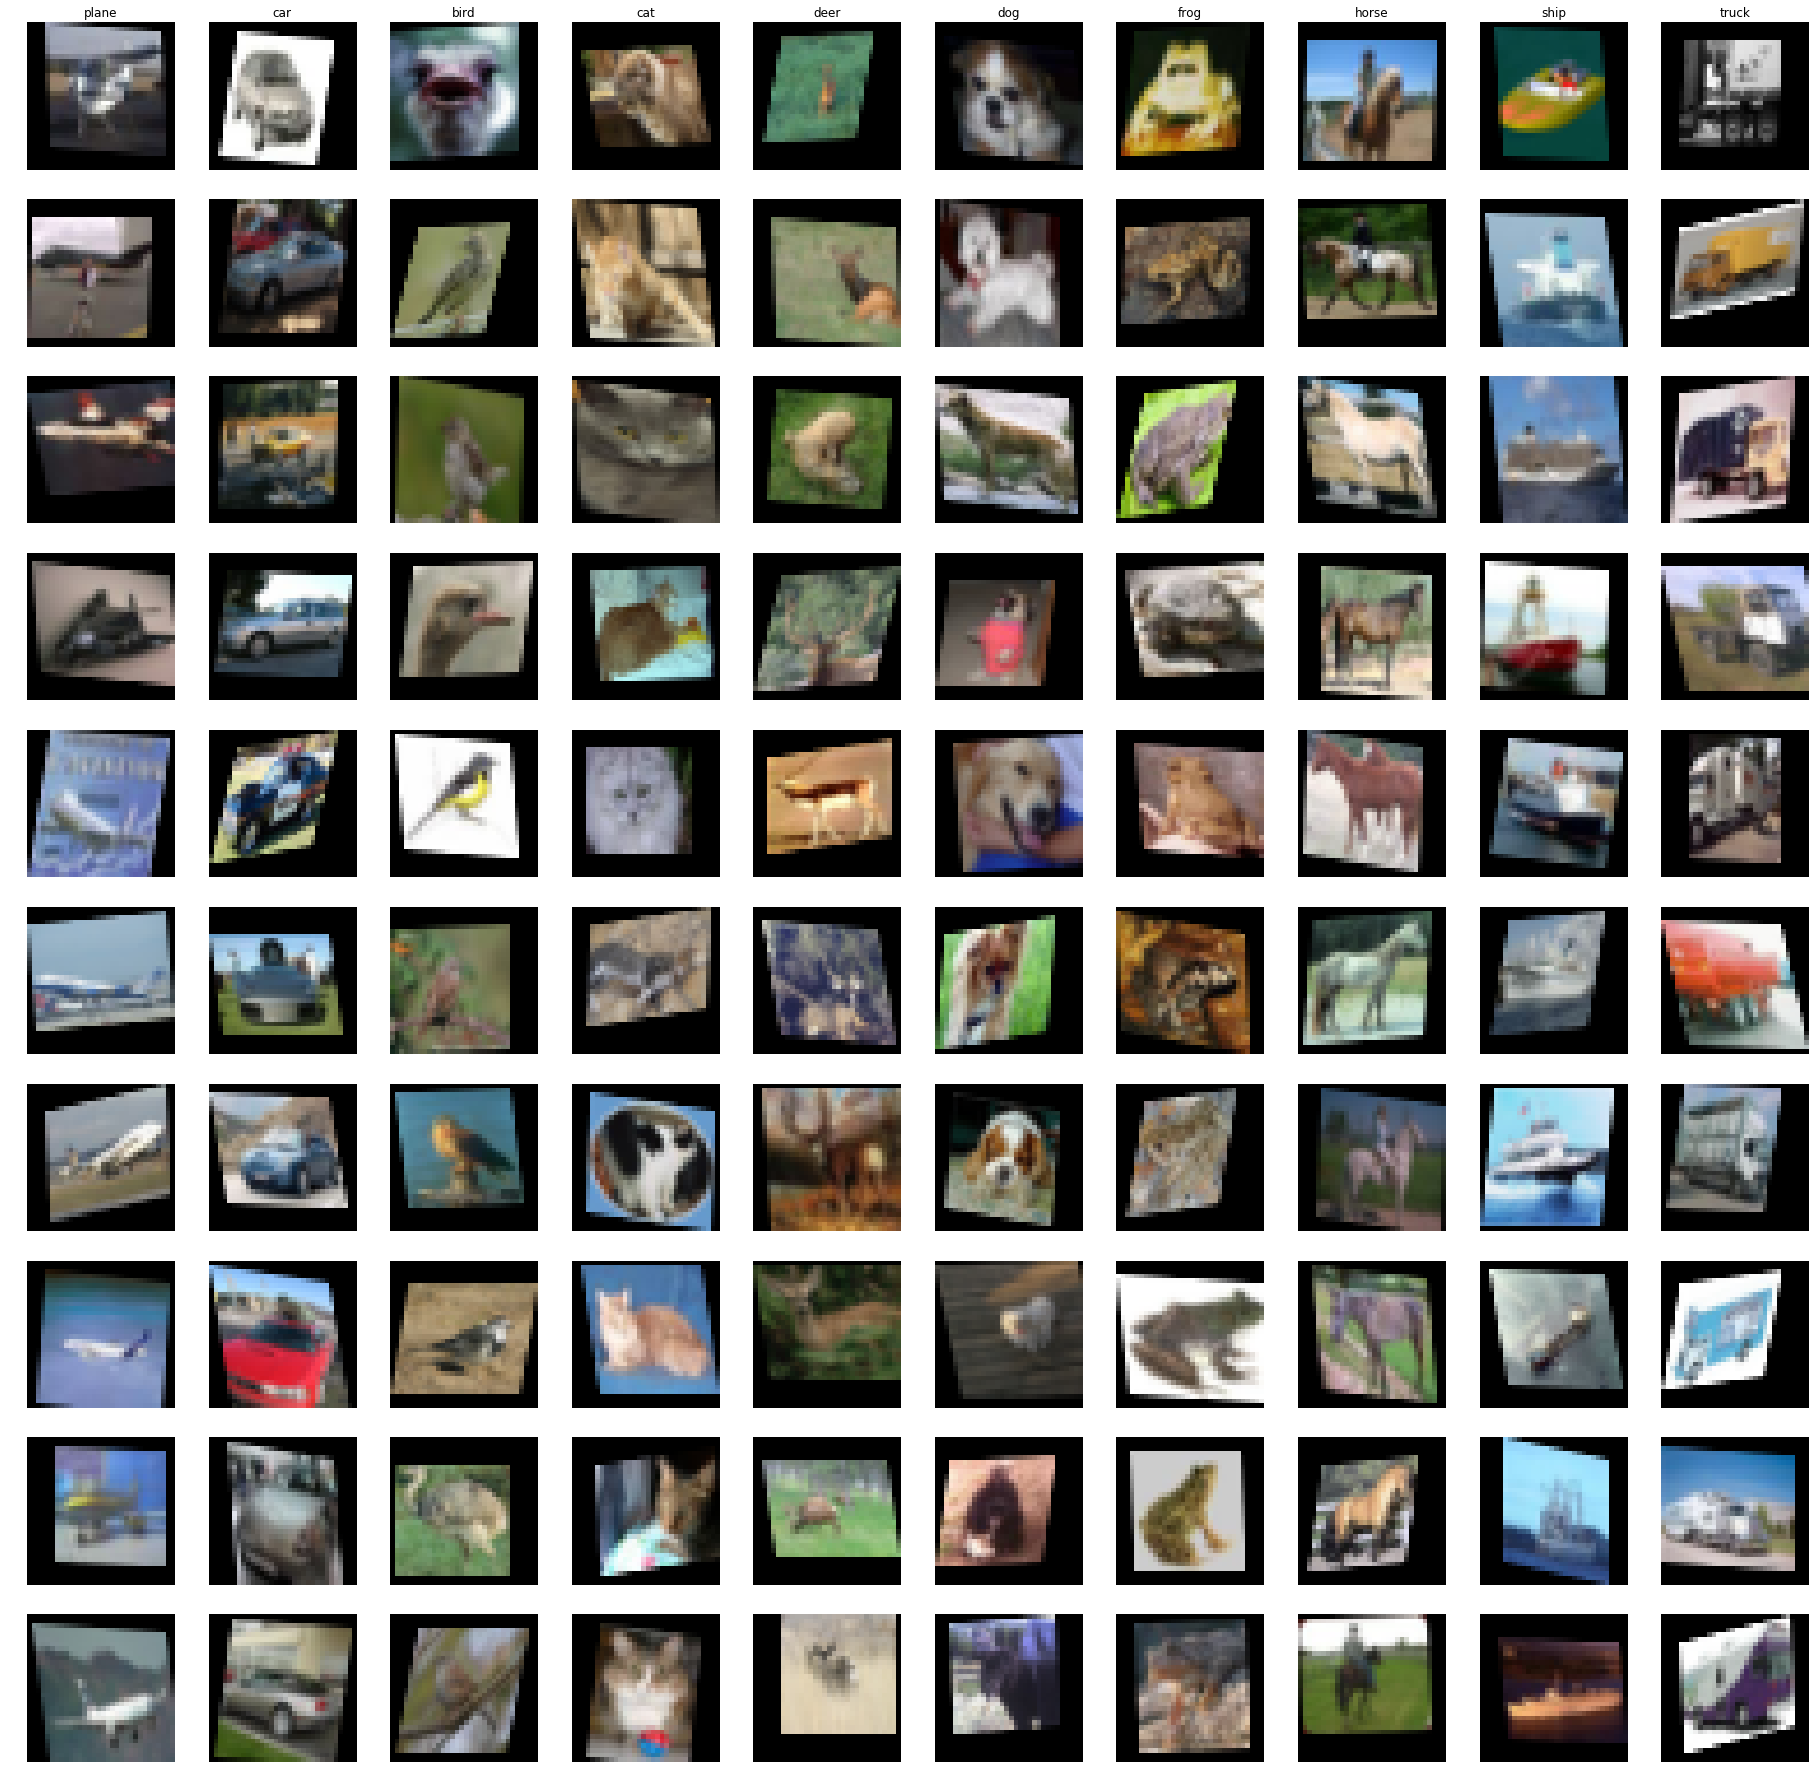

In [14]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit6/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

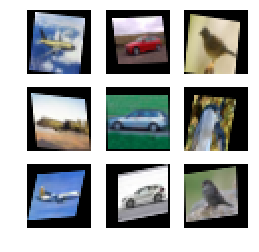

In [26]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit6/'
# print 'total image number: ', get_img_num(file_out_path)
random_show_specified_cifar10(file_out_path)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取8, limit）

In [11]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit8/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,8)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2.2 s, sys: 172 ms, total: 2.38 s
Wall time: 2.37 s


total image number:  5000


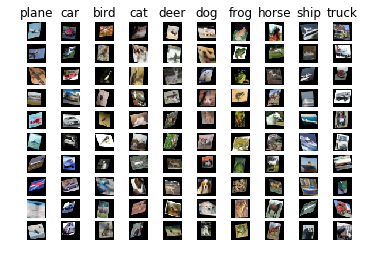

In [12]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomAffine_limit8/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### 对验证集（5,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取6, with_limit）

In [12]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_with_rat6_limit/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,6,flag=1)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 3.82 s, sys: 264 ms, total: 4.09 s
Wall time: 4.08 s


total image number:  10000


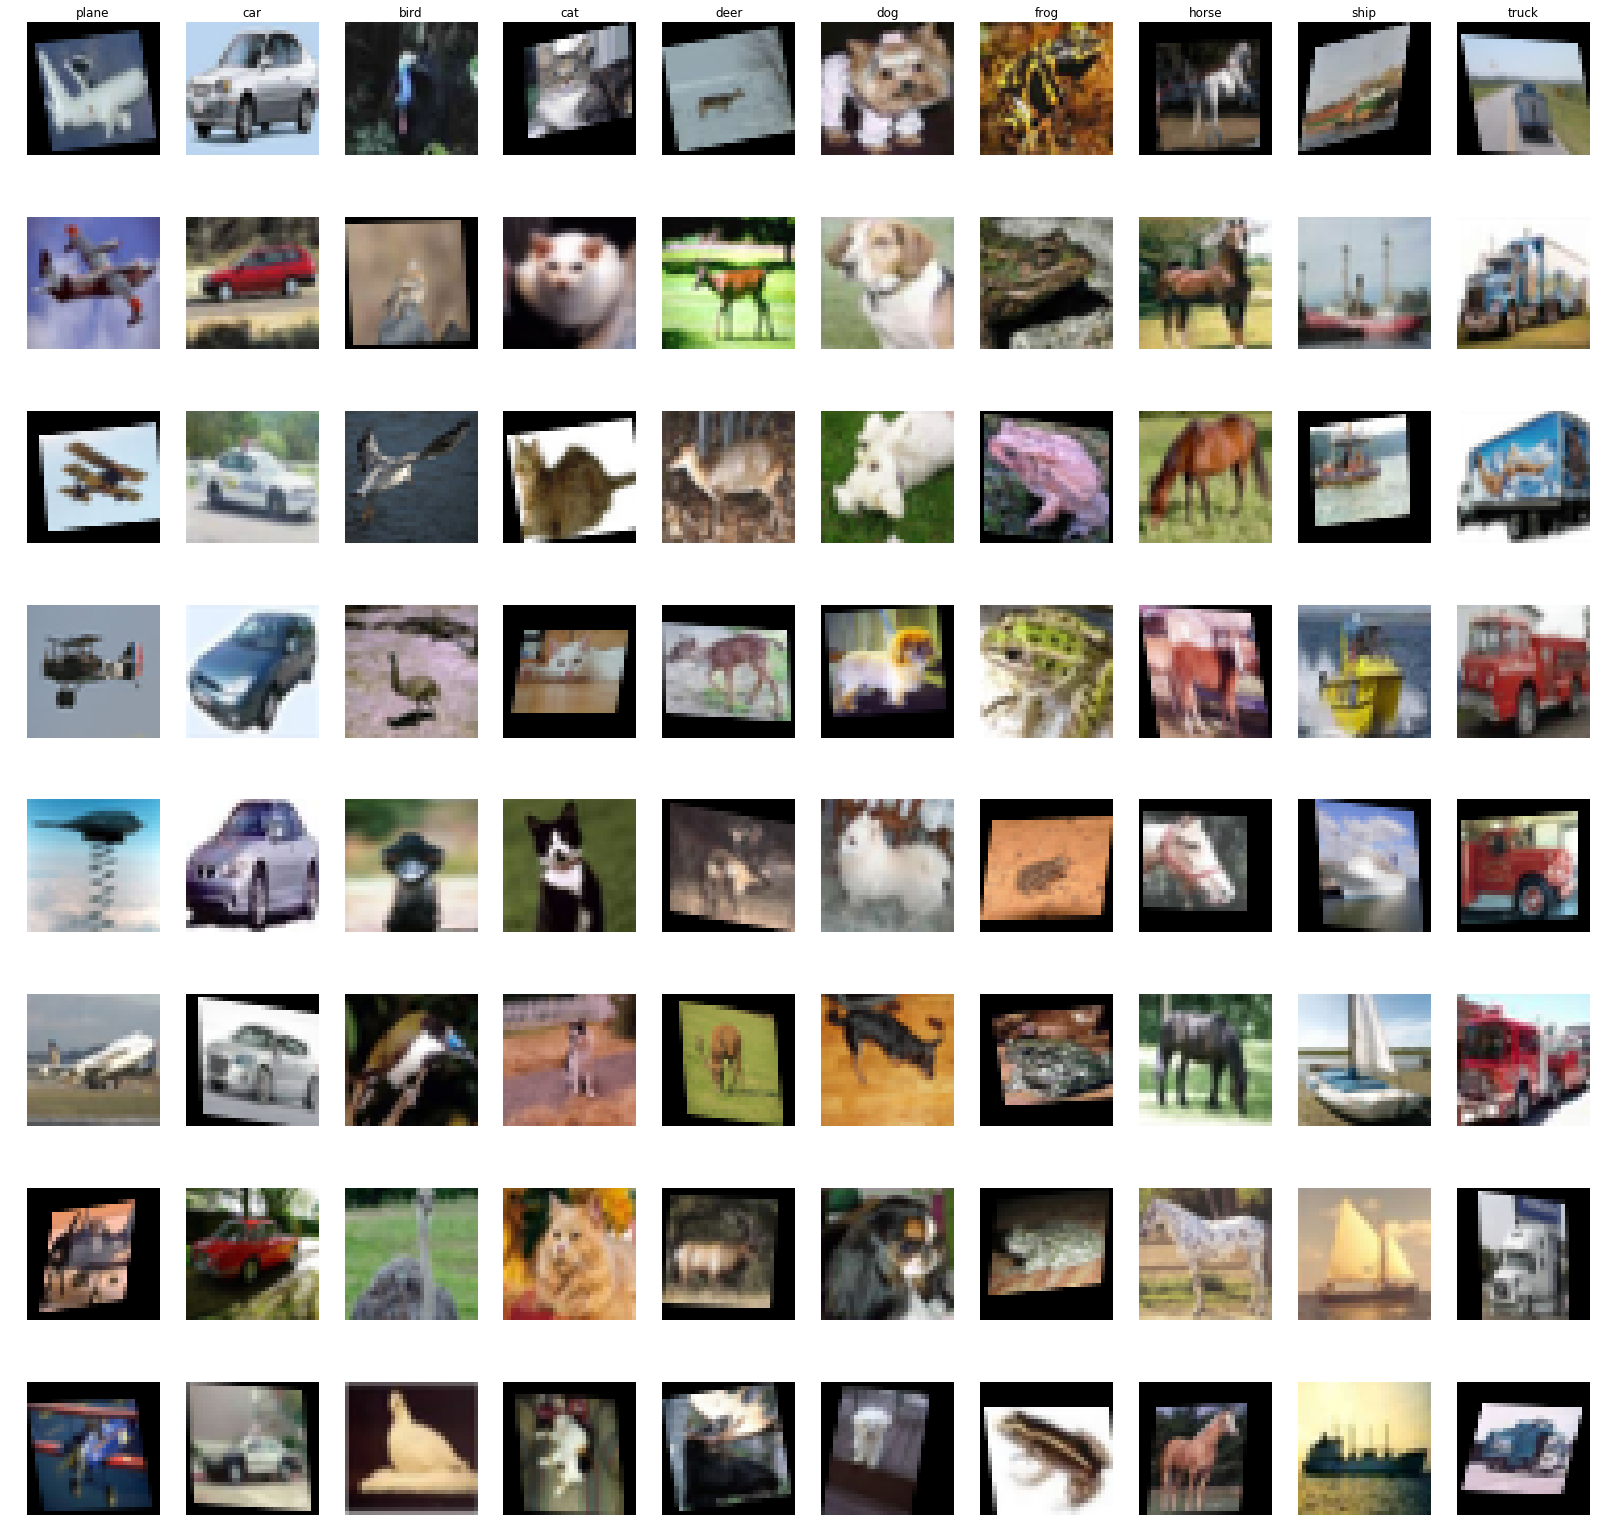

In [13]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_with_rat6_limit/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,8)

### 对训练集（45,000）做随机仿射变换，并保存在指定文件夹（最大偏移量取6, with_limit）

In [15]:
%%time
## 对验证集做随机仿射变换，并保存在指定文件夹（最大偏移量取2）
# 原始验证集（5,000）
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train/'
# 变换后验证集（5，000）
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_with_rat6_limit/'

cifar10_trans.PIL_randomAffine_limit(file_in_path,file_out_path,6,flag=1)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 2min 31s, sys: 10.6 s, total: 2min 42s
Wall time: 6min 4s


total image number:  90000


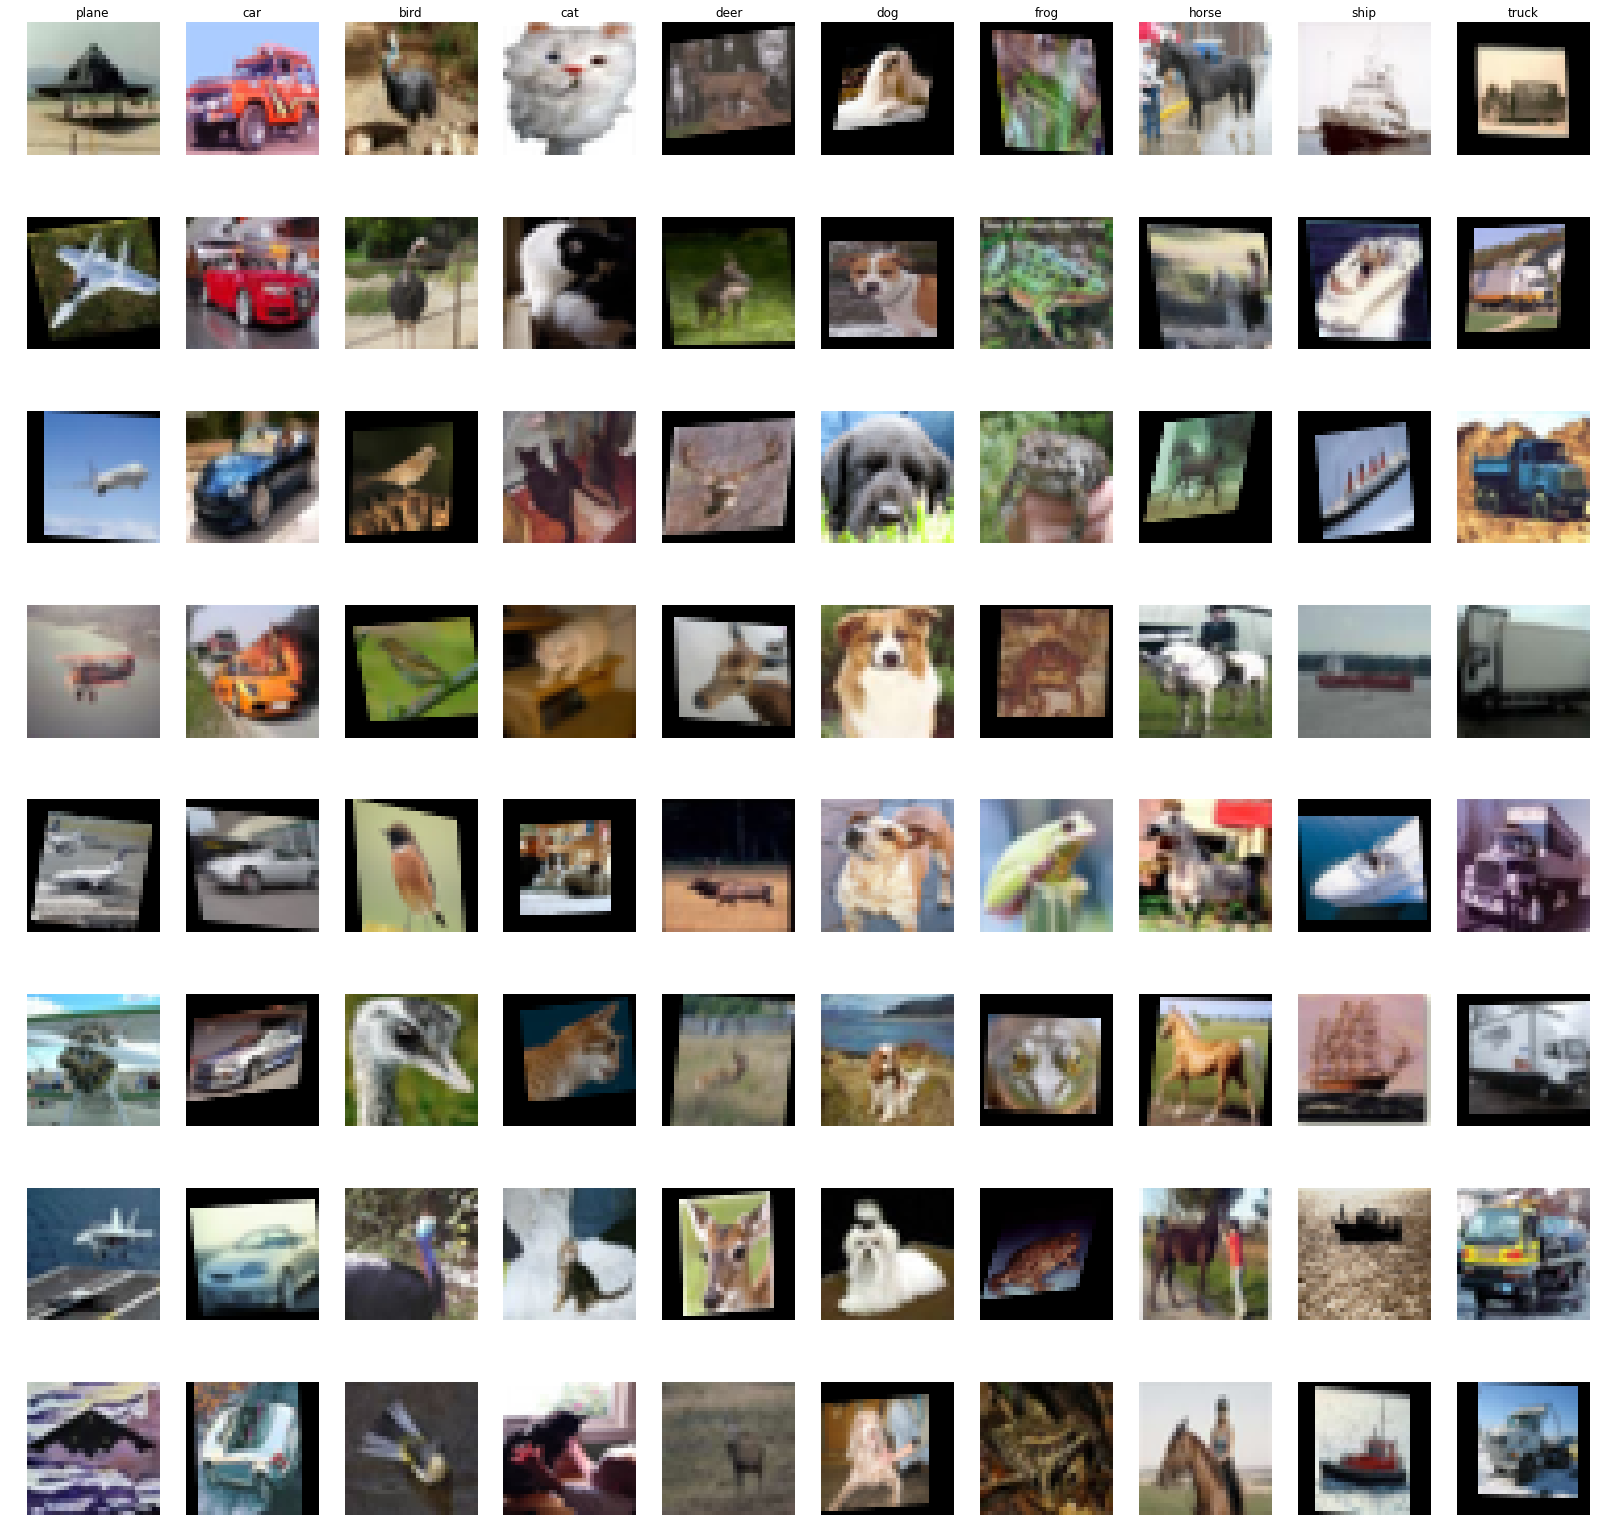

In [16]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_with_rat6_limit/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,8)

### 对训练集（45,000）随机仿射变换，并保存在指定文件夹（最大偏移量取6）
### (注意需要修改原函数！)

In [4]:
%%time
## 对训练集（45，000）随机仿射变换，并保存在指定文件夹（最大偏移量取6）
# 原始训练集（45,000）
file_in_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train/'
# 变换后训练集（45，000×2）
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_randomAffine/'

cifar10_trans.PIL_randomAffine(file_in_path,file_out_path,6,flag=1)

affining the images...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 1min 14s, sys: 5.14 s, total: 1min 19s
Wall time: 2min 32s


total image number:  90000


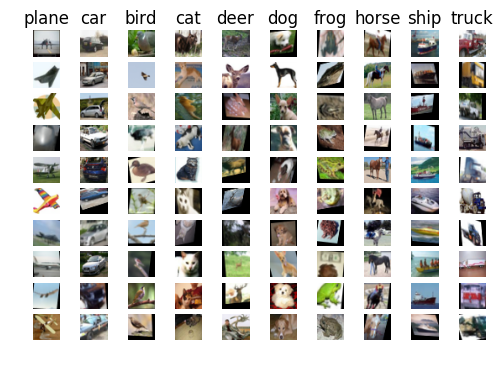

In [5]:
file_out_path = '/home/vicky/Documents/DataBase/cifar-10-batches-py/train_train_randomAffine/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### train_train, random_Rotate

In [4]:
%%time
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train/'
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_randomRotate/'
cifar10_trans.PIL_randomRotate(file_in_path,file_out_path,angle_min=-45,angle_max=45,times=10,flag=1)

rotating the images randomly...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 3min 55s, sys: 19.5 s, total: 4min 14s
Wall time: 9min 3s


total image number:  495000


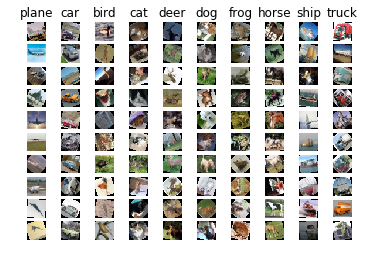

In [7]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_train_randomRotate/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)

### train_valid, randomRotate

In [8]:
%%time
file_in_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid/'
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomRotate/'
cifar10_trans.PIL_randomRotate(file_in_path,file_out_path,angle_min=-45,angle_max=45,times=10,flag=0)

rotating the images randomly...
0% finished...
5% finished...
10% finished...
15% finished...
20% finished...
25% finished...
30% finished...
35% finished...
40% finished...
45% finished...
50% finished...
55% finished...
60% finished...
65% finished...
70% finished...
75% finished...
80% finished...
85% finished...
90% finished...
95% finished...
done.
CPU times: user 18.8 s, sys: 1.53 s, total: 20.4 s
Wall time: 23.4 s


total image number:  50000


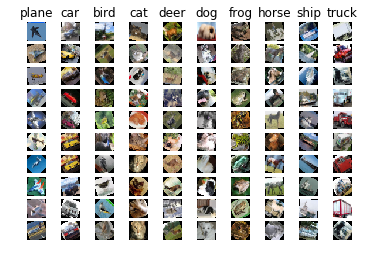

In [9]:
file_out_path = '/home/meringue/DataBase/cifar-10-batches-py/train_valid_randomRotate/'
print 'total image number: ', get_img_num(file_out_path)
random_show_cifar10(file_out_path,10)